In [36]:
import numpy as np
import matplotlib.pyplot as plt
import Modules.SQcircuit_extensions as sq_ext
import Modules.Fits as fits
from scipy.optimize import minimize
import qutip as qt
import os
import importlib
import pickle

importlib.reload(sq_ext)
importlib.reload(fits)

data_dir = r'/data'
opt_dir = r'/opt_results_low_energy/'

In [9]:
GHz     =   1e9
fF      =   1e-15
nH      =   1e-9

# Single circuit

## Qubit 1 [ Cooldown 1 ]

In [10]:
experiment_name = 'qubit_1_single_1'
load = False
# method = 'SLSQP'
method = 'Nelder-Mead'
# method = 'L-BF GS-B'
# method = 'TNC'
# method = 'Powell'
# method = 'COBYLA'


### Load spectral data and theoretical model

In [11]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

#Remove the part of the spectrum around phi_ext = 0
φ_ext_exp = φ_ext_exp[:15]
ω_exp = ω_exp[:15]
I_exp = I_exp[:15]

### Guess parameters and set bounds

In [13]:
ω_q = 3.92 * GHz
μ = 17.45 * GHz
I0_guess = I0
I_origin_guess = Iss - I0/2

ω_q = 3.9278e+09
μ = 1.6922e+10
I0_guess = 3.0961e-03
I_origin_guess = -1.9026e-03

parameters_guess = [I0_guess, I_origin_guess, ω_q, μ]

parameter_names = ['I0_q1', 'I_origin_q1', 'ω_q1', 'μ_q1']
bounds = fits.create_bounds(parameters_guess)
data_set = ([I_exp, ω_exp])

model_1 = parameter_names, parameters_guess, theoretical_spectrum, data_set, bounds 

### Plot guess to check

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

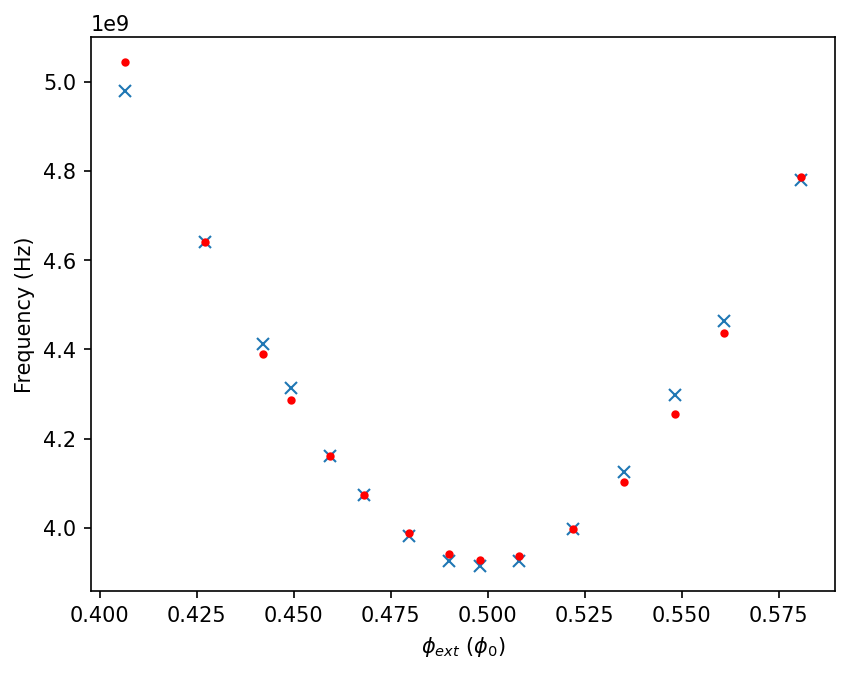

In [75]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, ax1 = plt.subplots(dpi=150)
ax1.plot(φ_ext_guess, ω_exp, 'x')
ax1.plot(φ_ext_guess, ω_guess, 'r.')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')


### Optimize or load previous optimization

In [654]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method, tol=1e-13).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.38460462617074015
4.39454815903632
4.758365896651396
2.7086402878502494
0.614954778118229
8.953204146470275
1.7001085681045565
5.5417363795642185
2.2849570161198867
2.2360014901524567
2.9624322350605787
1.0205962206457815
2.461208087758831
1.1541441730158077
2.809995860809652
0.6140834437307139
1.259065012714902
0.6559174852343006
0.8965548470344568
0.4966504783956742
0.684348091322021
0.4461586556363268
0.7501921447897105
0.3155452117305727
0.7578840745753674
0.38627583959817124
0.5252752320188789
0.36652987065672205
0.32060448308914374
0.5072925615421057
0.3051802249702034
0.5954655678249055
0.29146656543276883
0.3881315329411836
0.2993953312097087
0.41670493901553296
0.2900400951568203
0.3069327663065405
0.28397047321057317
0.28517079363578174
0.3040425917535553
0.27878845188277485
0.316322367568727
0.2771535577325449
0.2858475760102625
0.2793218991418385
0.29546293041607524
0.2736396522070389
0.30241719314127635
0.2717564874159622
0.27551757282767486
0.2713423528448267
0.28294865

In [655]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

I0 = 3.1700e-03
I_origin = -1.9350e-03
ω_q_1 = 3.9200e+09
μ_1 = 1.7450e+10


Optimized parameters 

I0 = 3.1662e-03
I_origin = -1.9390e-03
ω_q_1 = 3.9236e+09
μ_1 = 1.7457e+10


### Plot fits and errors

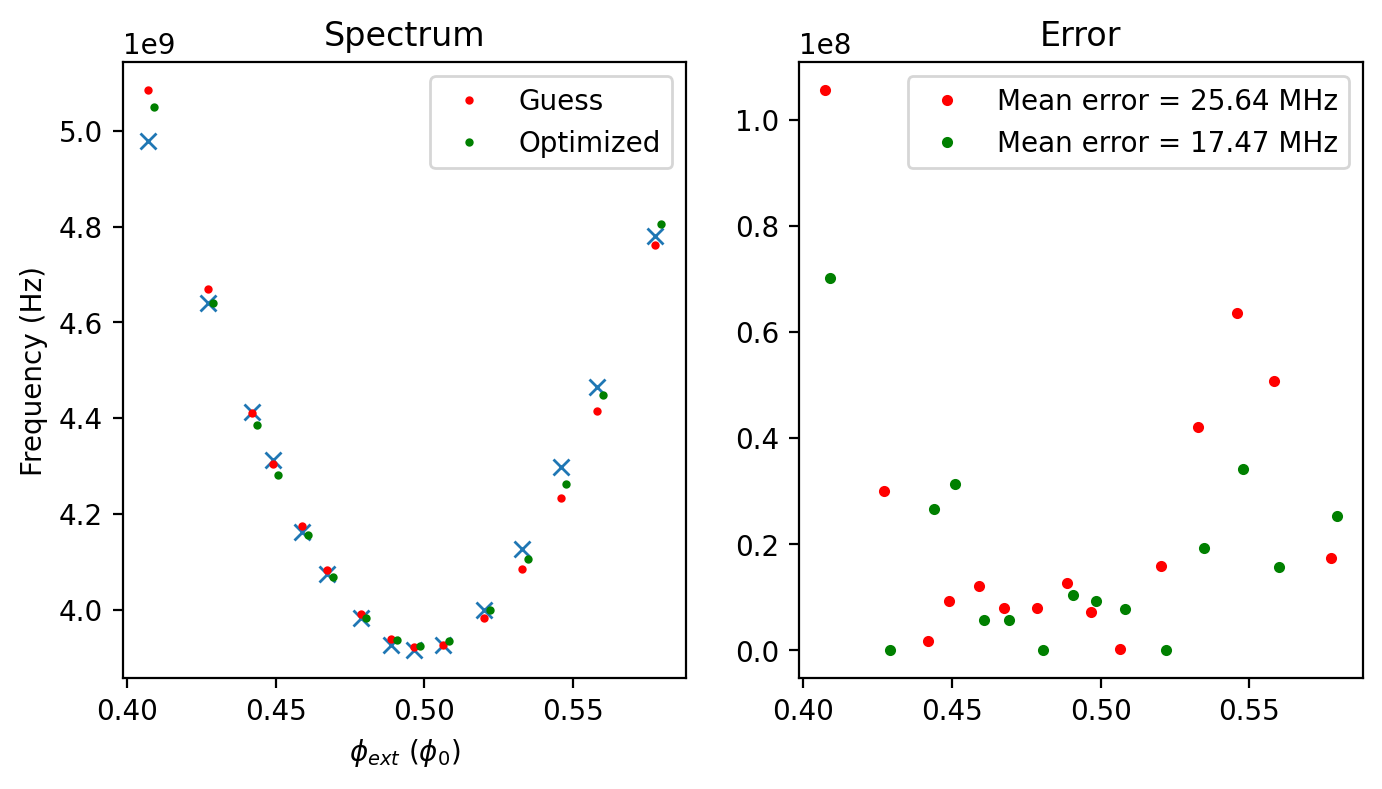

In [656]:
φ_ext_opt, ω_opt   = theoretical_spectrum(parameters_opt, data_set,  out = 'spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp  , ω_exp     , 'x')
ax1.plot(φ_ext_guess, ω_guess   , 'r.', markersize=4, label='Guess')
ax1.plot(φ_ext_opt  , ω_opt     , 'g.', markersize=4, label='Optimized')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax1.set_title('Spectrum')
ax1.legend()
ax2.set_title('Error')

ax2.plot(φ_ext_guess, np.abs(ω_guess-ω_exp), 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax2.plot(φ_ext_opt, np.abs(ω_opt-ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

## Resonator 1 [ Cooldown 1 ]

In [18]:
experiment_name = 'resonator_1_single_1'
load = False

### Load spectral data and theoretical model

In [19]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [20]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

### Guess parameters and set bounds

In [22]:
I0_guess = I0
I_origin_guess = Iss - I0/2

I0_guess = 2.9466e-03
I_origin_guess = -1.8283e-03
ω_r = 6.6132e+09
g_Φ = 1.0818e+08
ω_q = 5.9241e+09
μ = 7.2222e+09


crossing_index_1  = 11
crossing_index_2  = 10
extra_important_indices = []
important_multiplier = 1

parameter_names = ['I0_guess_r1', 'I_origin_guess_r1', 'ω_r1', 'g_Φ_q1r1', 'ω_q1', 'μ_q1' ]
parameters_guess = [I0_guess, I_origin_guess, ω_r, g_Φ, ω_q, μ]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, extra_important_indices, important_multiplier])
bounds = fits.create_bounds(parameters_guess)

model_2 = parameter_names, parameters_guess, theoretical_spectrum, data_set, bounds 

In [37]:
models = [model_1,model_2]

### Plot guess to check

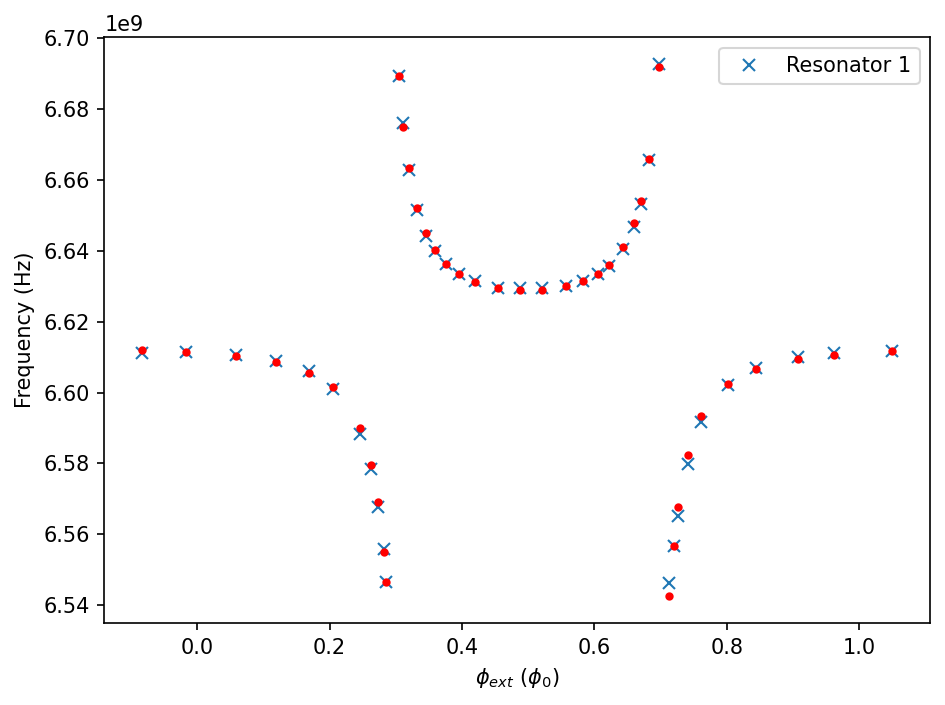

In [690]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_guess, ω_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_guess, ω_guess, '.r')
ax.plot(φ_ext_guess[extra_important_indices], ω_guess[extra_important_indices], '*')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

### Optimize or load previous optimization

In [691]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='Nelder-Mead').x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.028615053020614623
0.7639335195647888
0.9636416360748482
11.950198599645239
0.09688662259782314
1.6902810293332549
0.2742893434181242
10.641123104828088
5.588676371306748
6.274258777675042
2.7717914601092994
3.261597676628933
1.3174061489222164
1.7718557027353687
0.6524310319941378
1.500882629615781
0.6344320060406141
1.5086744207392158
0.392630947639081
1.2103314509207506
0.3388857499830532
0.627118019948042
0.5458261801723404
0.8851230535153695
0.2553093932373514
0.564735894959012
0.26649674394028855
0.5551268338753786
0.16480551348175143
0.44398483183327675
0.14564474371525382
0.375715310969223
0.13598836367383765
0.27384827238313963
0.14093071223622036
0.3512413414102154
0.10812432747020721
0.23106291779737567
0.0733985883099327
0.1998491421541672
0.06764191676977921
0.10795034837596894
0.19052098061242198
0.06416745465123558
0.14539737672652436
0.05531001407060051
0.13671159049055195
0.06142766109499836
0.08467206903582478
0.047781710679037095
0.10456495293517018
0.0421549697367

In [692]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

I0_guess = 2.9466e-03
I_origin_guess = -1.8283e-03
ω_r = 6.6132e+09
g_Φ = 1.0818e+08
ω_q = 5.9241e+09
μ = 7.2222e+09


Optimized parameters 

I0_guess = 2.9477e-03
I_origin_guess = -1.8289e-03
ω_r = 6.6132e+09
g_Φ = 1.0819e+08
ω_q = 5.9239e+09
μ = 7.2259e+09


### Plot fits and errors

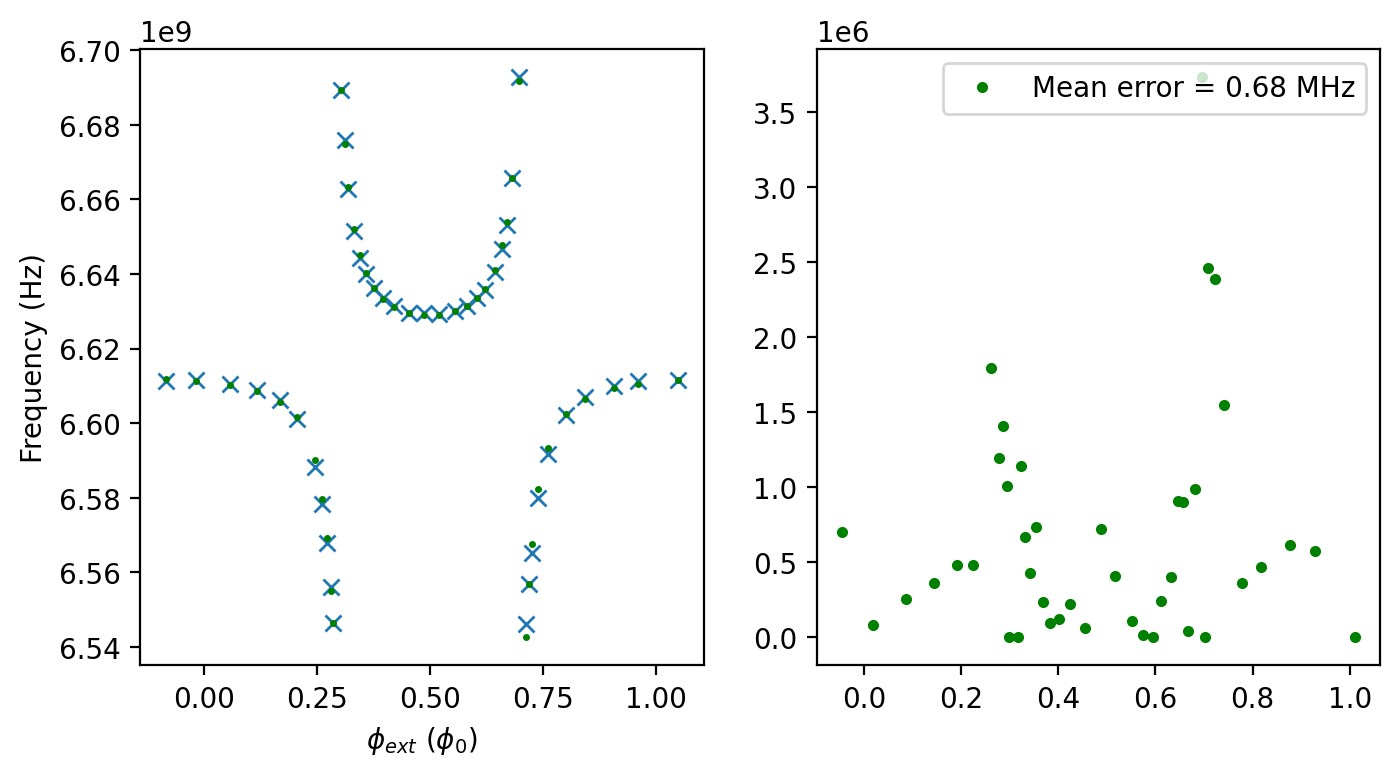

In [693]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_opt  , ω_exp, marker='x', ls='', label='Resonator 1')
# ax1.plot(φ_ext_guess, ω_guess, '.r', markersize=3)
ax1.plot(φ_ext_opt  , ω_opt, 'g.', markersize=3)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

# ax2.plot(φ_ext_exp, np.abs(ω_guess - ω_exp), 'r.', label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax2.plot(φ_ext_exp, np.abs(ω_opt   - ω_exp), 'g.', label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

 ## Qubit 1 and Resonator 1 [Cooldown 1]

In [25]:
experiment_name = 'resonator_and_qubit_1_single_1'


### Load spectral data and theoretical model

In [26]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F = fits.get_experimental_spectrum('qubit_1_single_1')

#Remove the part of the spectrum around phi_ext = 0
φ_ext_exp_F   = φ_ext_exp_F[:15]
ω_exp_F       = ω_exp_F[:15]
I_exp_F       = I_exp_F[:15]

In [27]:
φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = fits.get_experimental_spectrum('resonator_1_single_1')

In [28]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

### Guess parameters and set bounds

In [29]:
I0_F, I_origin_F, ω_q, μ = np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']
I0_R, I_origin_R, ω_r, g_Φ, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_1_single_1' + '.npz')['parameters_opt']

I0_F = 3.0961e-03
I_origin_F = -1.9026e-03
ω_q = 3.9278e+09
μ = 1.6922e+10
I0_R = 3.8209e-03
I_origin_R = -2.2667e-03
ω_r = 6.6120e+09
g_Φ = 2.6024e+08

crossing_index_1_R = 11
crossing_index_2_R = 10
extra_important_indices = []
important_multiplier = 1

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_R, crossing_index_2_R, extra_important_indices, important_multiplier])
parameters_guess = [I0_F, I_origin_F, ω_q, μ, I0_R, I_origin_R, ω_r, g_Φ]

parameter_names = ['I0_F', 'I_origin_F', 'ω_q', 'μ', 'I0_R', 'I_origin_R', 'ω_r', 'g_Φ']

bounds = fits.create_bounds(parameters_guess, flexible_param_indices=[2,3,6,7])

### Plot guess to check

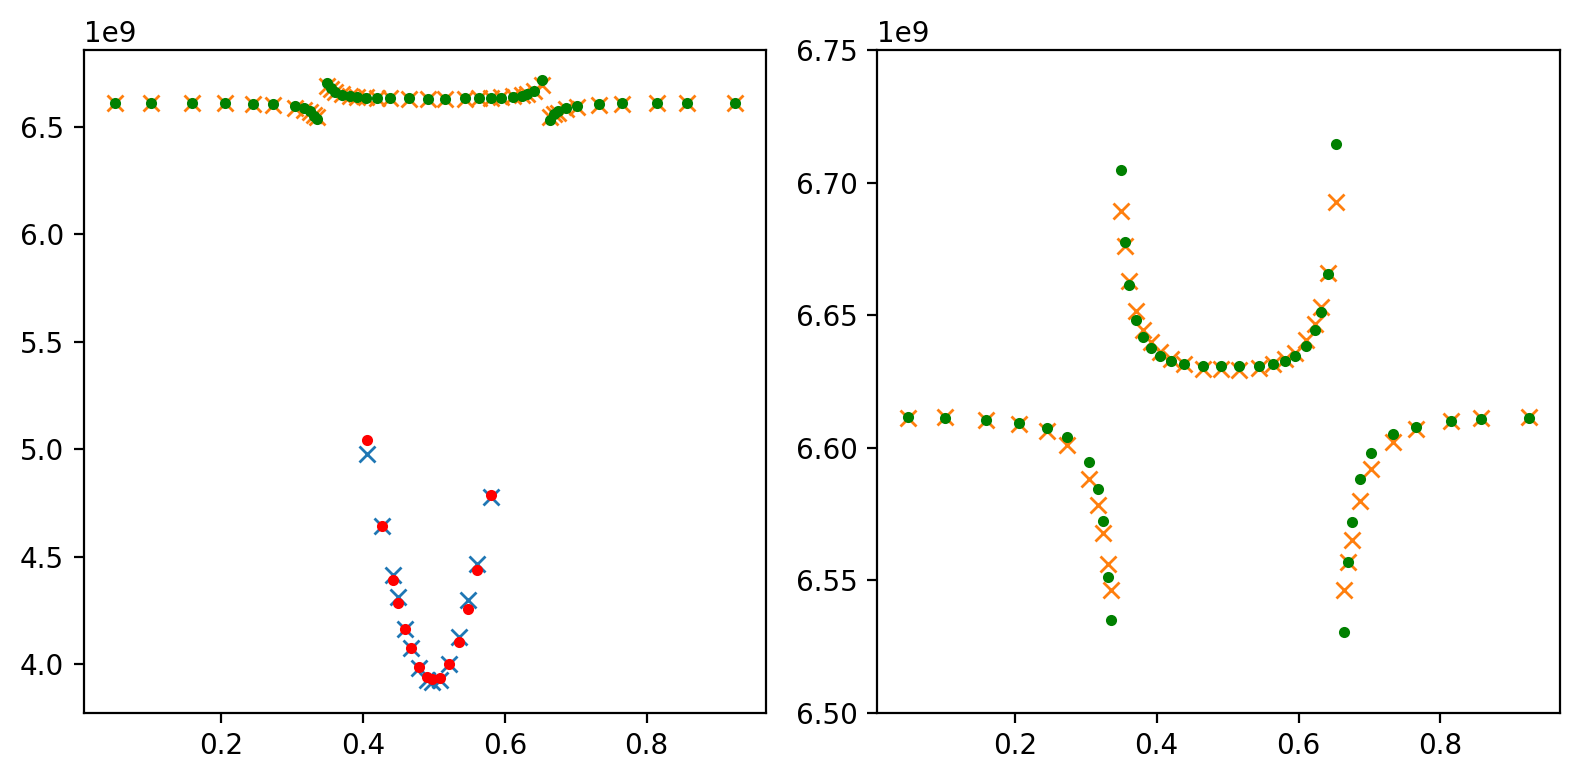

In [30]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_F_guess, ω_exp_F, 'x')
    ax.plot(φ_ext_R_guess, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.g')
    
ax2.set_ylim([6.5e9,6.75e9])
fig.tight_layout()

### Optimize or load previous optimization

In [54]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.26234482206826354
0.1449733135266838
0.40731813559494734
4.004318377522983
0.1449733135266838
4.149291691049667
4.864363711987421
0.1449733135266838
5.009337025514105
2.710342463112902
0.3341251669392052
3.0444676300521074
0.48215352816422796
0.4894130704647369
0.9715665986289649
0.26234482206826354
2.593826052521905
2.8561708745901684
0.26234482206826354
3.244734228801959
3.5070790508702223
0.26234482206826354
13.052352050819406
13.31469687288767
0.26234482206826354
0.1764515560134907
0.4387963780817542
0.6208360440488563
12.82279102646072
13.443627070509576
0.30068970957355834
6.623890504763736
6.924580214337294
0.4841818418890214
6.450843088027977
6.935024929916998
0.3211317529267192
3.353441001777299
3.674572754704018
6.899078663923506
0.9367052572913904
7.8357839212148965
2.151093176671525
0.2981128289938898
2.4492060056654146
4.976319591933699
0.9931050497487831
5.969424641682481
2.016865873374426
0.31049634829036044
2.327362221664786
0.5661132251488328
3.0852649220926915
3.651

In [55]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

I0_F = 3.0957e-03
I_origin_F = -1.9024e-03
ω_q = 3.9279e+09
μ = 1.6918e+10
I0_R = 3.8203e-03
I_origin_R = -2.2664e-03
ω_r = 6.6120e+09
g_Φ = 2.6023e+08


Optimized parameters 

I0_F = 3.0961e-03
I_origin_F = -1.9026e-03
ω_q = 3.9278e+09
μ = 1.6922e+10
I0_R = 3.8209e-03
I_origin_R = -2.2667e-03
ω_r = 6.6120e+09
g_Φ = 2.6024e+08


### Plot fits and errors

(6550000000.0, 6650000000.0)

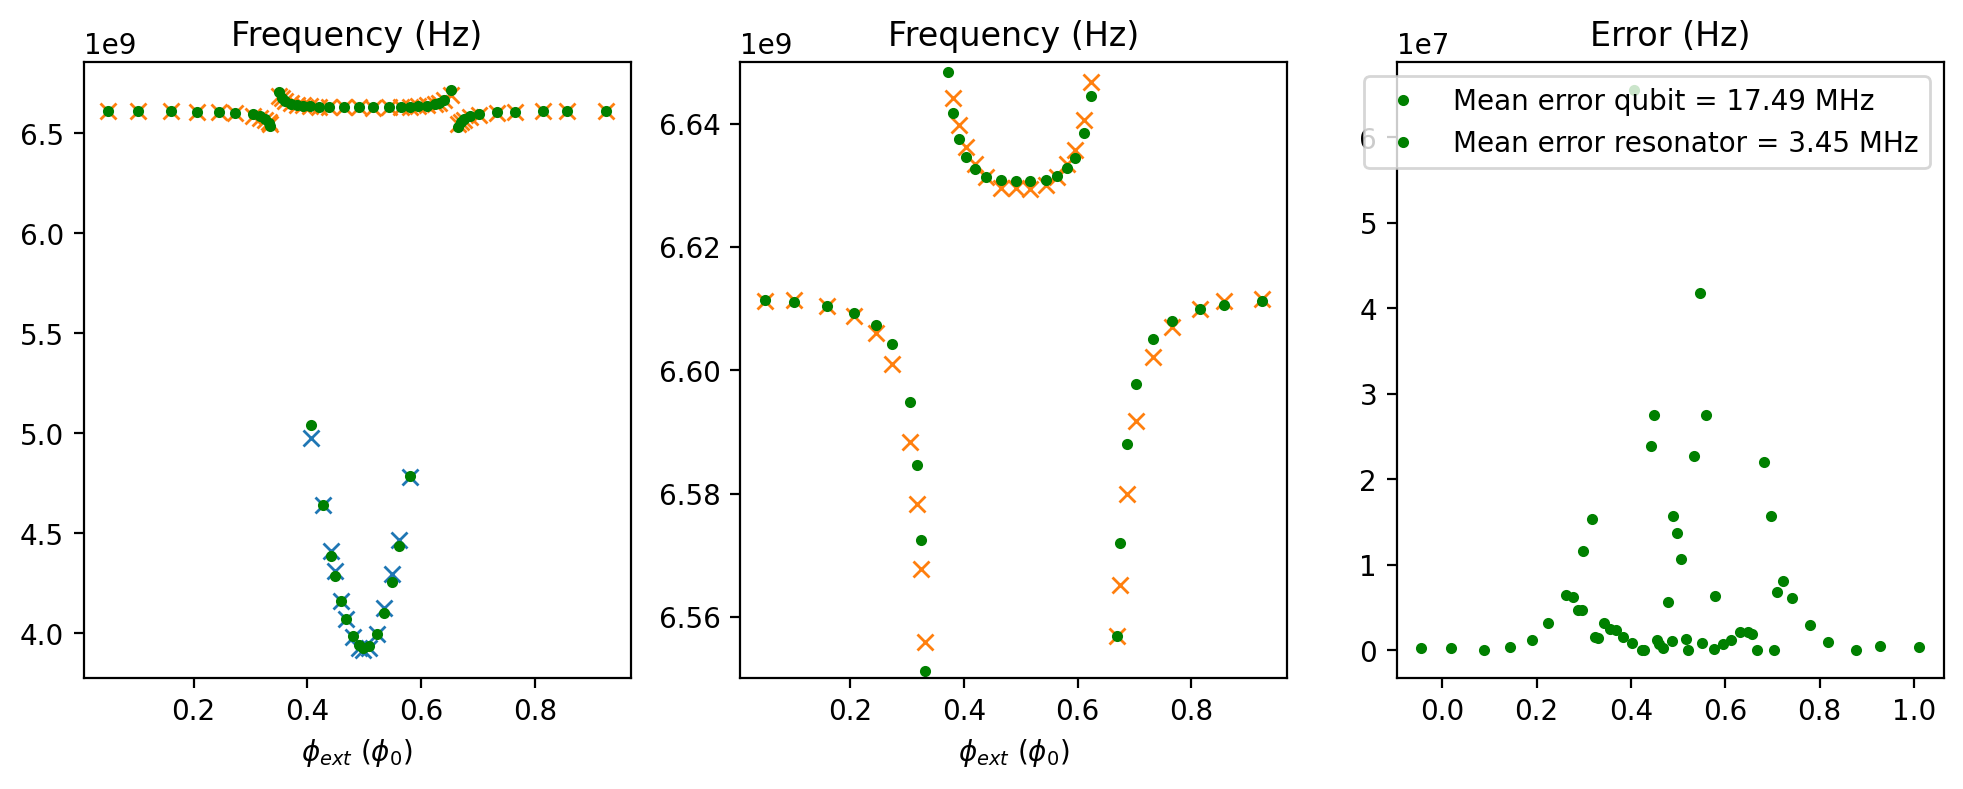

In [63]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_F_opt     , ω_exp_F   , 'x')
    ax.plot(φ_ext_R_opt     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.' , label = f'Mean error qubit = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.' , label = f'Mean error resonator = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3. legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.55e9,6.65e9])


## Qubit 1 and Resonator 1 [Cooldown 2]

In [295]:
experiment_name = 'resonator_and_qubit_1_single_2'


### Load spectral data and theoretical model

In [296]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F, φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = (
    fits.get_experimental_spectrum(experiment_name))

In [297]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [298]:
CF_1, LF_1, EJ_1, _, _, CR_1, LR_1, Δ_1, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_and_qubit_1_single_1' + '.npz')['parameters_opt']

I0_F_1 = I0_F
I_origin_F_1 = Iss_F - I0_F/2

I0_R_1 = I0_R
I_origin_R_1 = Iss_R - I0_R/2

crossing_index_1_F = 30
crossing_index_1_R = 10
crossing_index_2_R = 10
nmax_r = 5
nmax_f = 15

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1, CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0_F_1', 'I_origin_F_1',
                   'CR_1', 'LR_1', 'Δ_1', 'I0_R_1', 'I_origin_R_1']

bounds = fits.create_bounds(parameters_guess)

### Plot guess to check

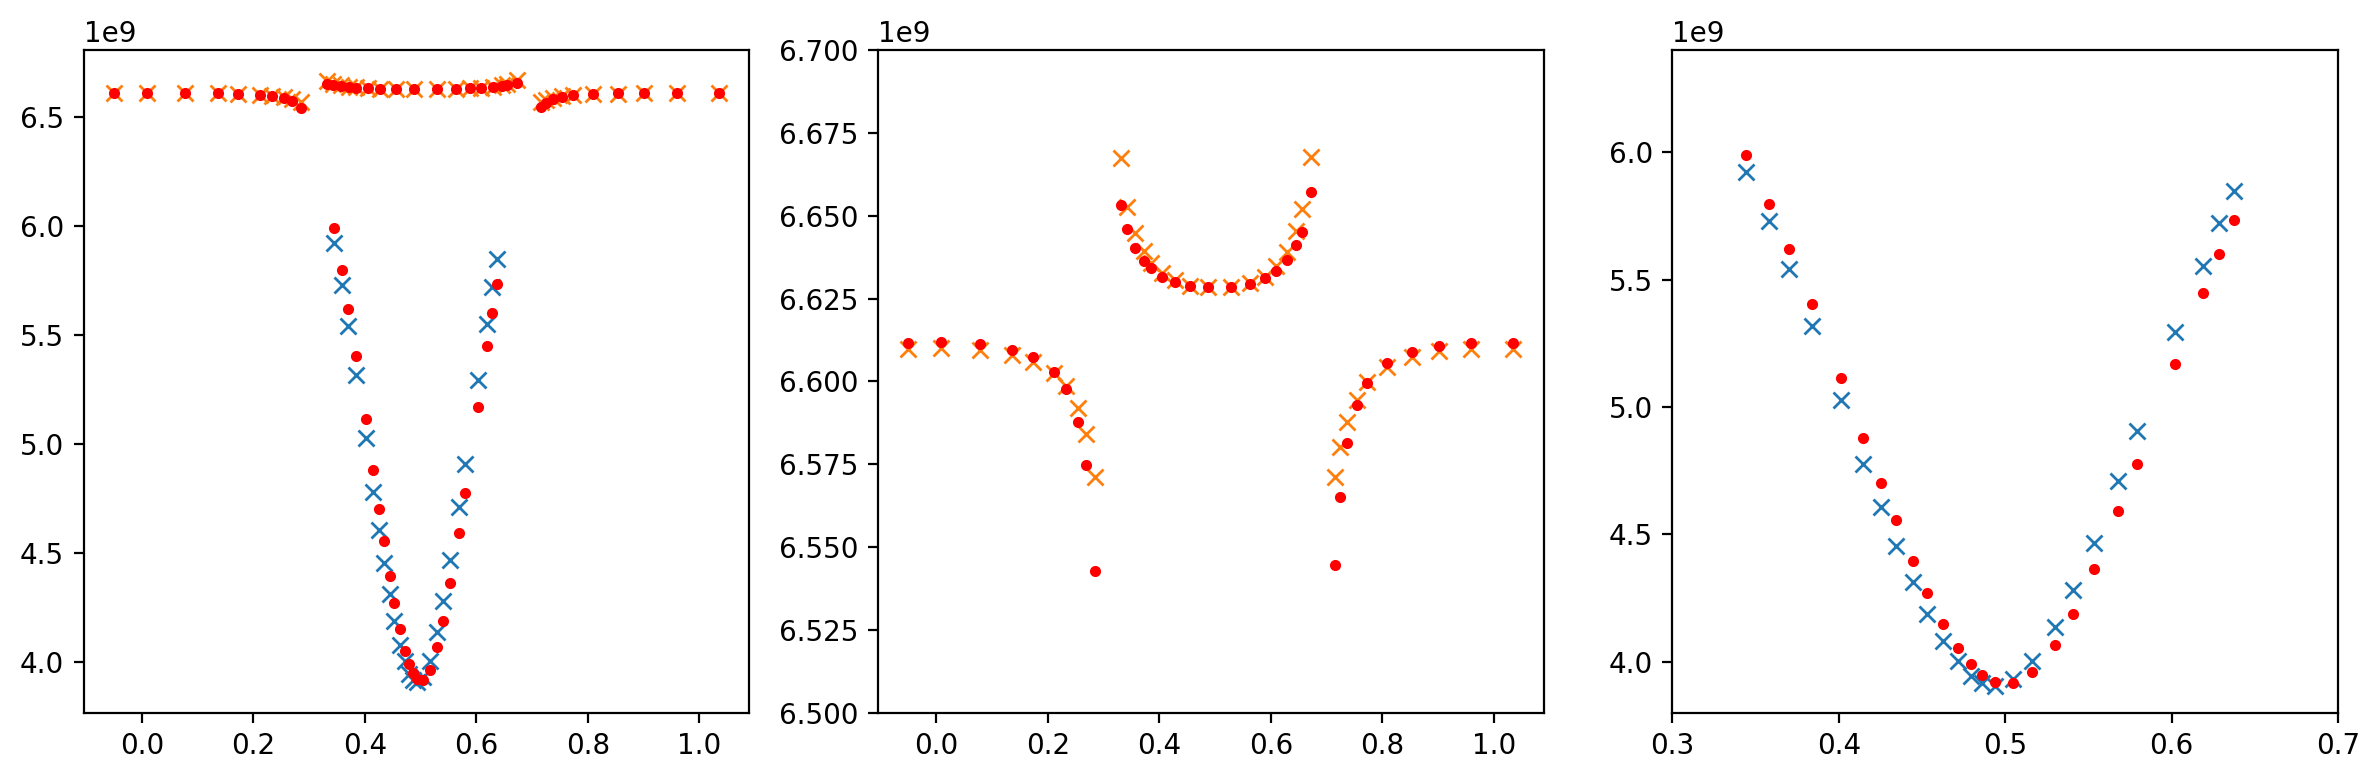

In [299]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[12,4], dpi=200)
for ax in (ax1, ax2, ax3):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.5e9,6.7e9])
ax3.set_ylim([3.8e9, 6.4e9])
ax3.set_xlim([0.3,0.7])
#ax.set_ylabel(r'$')
#ax.set_xlabel(r'$')
#ax.set_title(r'$')
fig.tight_layout()

### Optimize or load previous optimization

In [300]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

2.270262216789377
2.2702622145833407
2.270262213547341
2.2702622065216205
2.270772059457286
2.271307742439048
2.2702622601241242
2.270262219282409
2.270262215530952
2.2702743468749045
2.270266571936125
72.88738795486253
72.88738793886708
72.88738795180709
72.8873878795528
72.88691184537151
72.88663998732594
72.88738772535157
72.88738794434755
72.88738794714338
72.88720247995509
72.88714212230326
5.175099674055779
5.175099678641512
5.175099681944944
5.175099706173825
5.174585599089385
5.174072843073023
5.175099470746175
5.175099662652253
5.175099673306864
5.175082495576055
5.1750753667069835
1.6058630934969491
1.6058630902778335
1.6058630908625218
1.6058630956206557
1.6063786603343755
1.6069129755972438
1.6058628960940986
1.6058630822467346
1.6058630910346259
1.6058458629549635
1.6058406960459686
36.10349257969182
36.103492573641745
36.10349257856296
36.10349261844591
36.103073981088514
36.10281226569865
36.10349235901687
36.103492567133735
36.103492574265715
36.10351692405327
36.103538

In [301]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 24.271
LF_1 = 27.891
EJ_1 = 4.999
I0_F_1 = 0.003
I_origin_F_1 = -0.000
CR_1 = 5.757
LR_1 = 100.346
Δ_1 = 1.047
I0_R_1 = 0.003
I_origin_R_1 = -0.000


Optimized parameters 

CF_1 = 24.271
LF_1 = 27.892
EJ_1 = 5.001
I0_F_1 = 0.003
I_origin_F_1 = -0.000
CR_1 = 5.755
LR_1 = 100.346
Δ_1 = 1.048
I0_R_1 = 0.003
I_origin_R_1 = -0.000


### Plot fits and errors

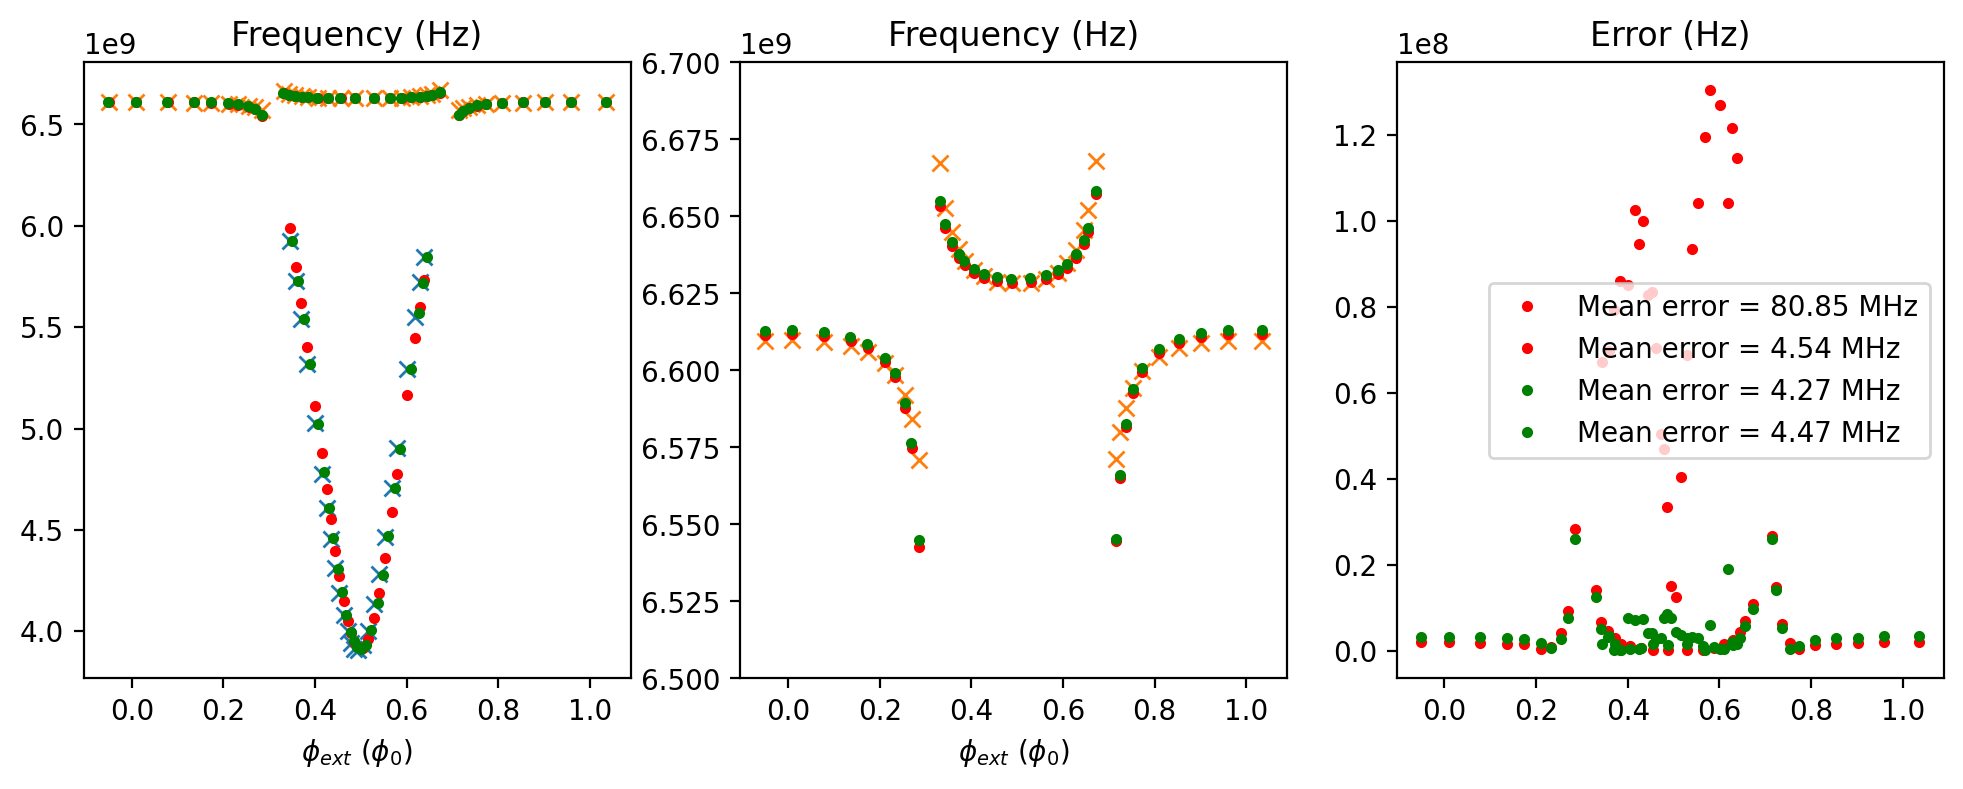

In [302]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).mean()/1e6:.2f} MHz'  )
    
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.5e9,6.7e9])
ax3.legend()

# Qubit 1

In [25]:
experiment_name = 'qubit_1'
load = False
method = 'Nelder-Mead'


### Load spectral data and theoretical model

In [32]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

#Remove the part of the spectrum around phi_ext = 0
φ_ext_exp = φ_ext_exp[:22]
ω_exp = ω_exp[:22]
I_exp = I_exp[:22]

## Guess parameters and set bounds

In [33]:
_,_ , ω_q, μ= np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']

I0_guess = I0
I_origin_guess = Iss - I0/2
# I0_guess = I0
# I_origin_guess = Iss - I0/2
parameters_guess = [I0_guess, I_origin_guess, ω_q, μ]

parameter_names = ['I0', 'I_origin', 'ω_q_1', 'μ_1']
bounds = fits.create_bounds(parameters_guess)
data_set = ([I_exp, ω_exp])
parameters_guess

[0.00321, -0.001595, 3923625919.414407, 17457047360.04482]

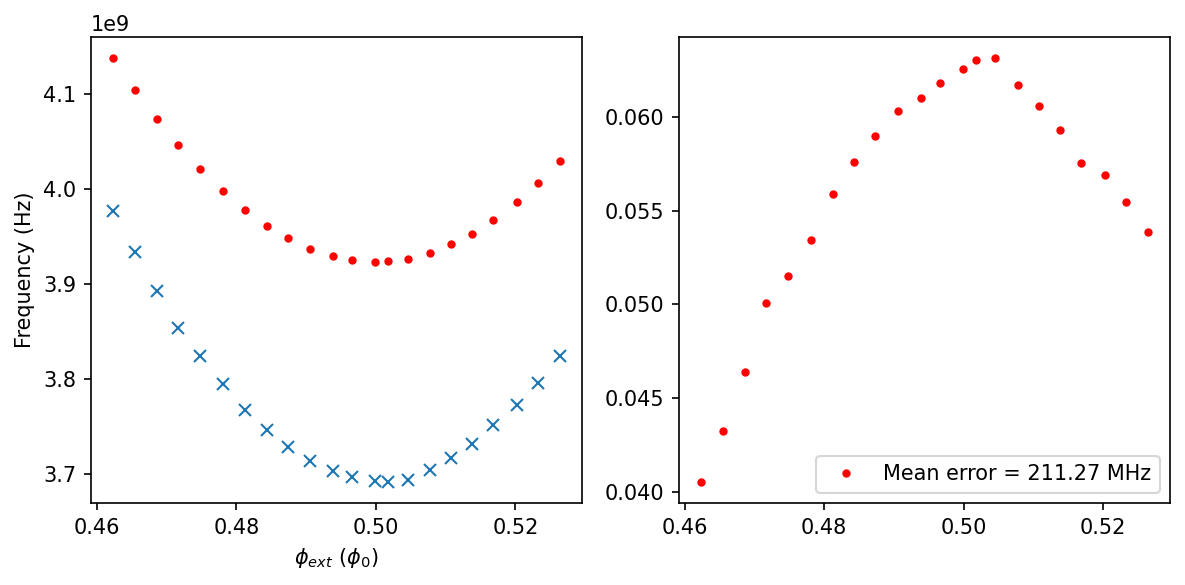

In [34]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax2, ax3) = plt.subplots(dpi=150, ncols=2, figsize=[4*2,4])
ax2.plot(φ_ext_guess, ω_exp, 'x')
ax2.plot(φ_ext_guess, ω_guess, 'r.')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')

# ax2.set_ylim([3.5e9,4e9])
# ax2.set_xlim([0.45,0.55])

ax3.plot(φ_ext_guess, np.abs(ω_guess-ω_exp)/ω_exp, 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax3.legend()

fig.tight_layout()

## Optimize or load previous optimization

In [35]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='Nelder-Mead', tol=1e-13).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

4.647937618918255
7.163319989425144
5.83352342000817
8.90211503805854
4.782547715836534
0.4964876922659874
3.8362036537287914
7.165170141480898
4.673048071127215
6.372899926992712
4.07413289180623
1.785300752689941
2.4398549959325604
1.7753992469886641
2.7544299450637637
1.083013654544333
0.9125657324852786
3.2040873640877714
0.7925200421981315
1.553399480533702
0.5900988469289264
1.666153138859367
0.5765404286187225
1.3945281388010506
0.4106230720253706
0.6003985659561004
0.3676546175516791
0.6604881364964323
0.32479302363662865
0.801328221692584
0.37734215665837334
0.9450980415876589
0.27282446783930636
0.25378083023514125
0.34836265723544835
0.5057555620589986
0.29223405775158834
0.4573282599292569
0.2843066544211564
0.2662412500163021
0.2511109948468499
0.30332595531973694
0.42570094116664936
0.25288734799852514
0.21781304918531275
0.20756149467775775
0.3061271566811471
0.23797195592255782
0.22974691221781016
0.19005269870288563
0.205845301376688
0.33387408522095824
0.2164101117107

In [36]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

I0 = 3.2100e-03
I_origin = -1.5950e-03
ω_q_1 = 3.9236e+09
μ_1 = 1.7457e+10


Optimized parameters 

I0 = 3.1511e-03
I_origin = -1.5641e-03
ω_q_1 = 3.6937e+09
μ_1 = 1.8965e+10


## Plot fits and errors

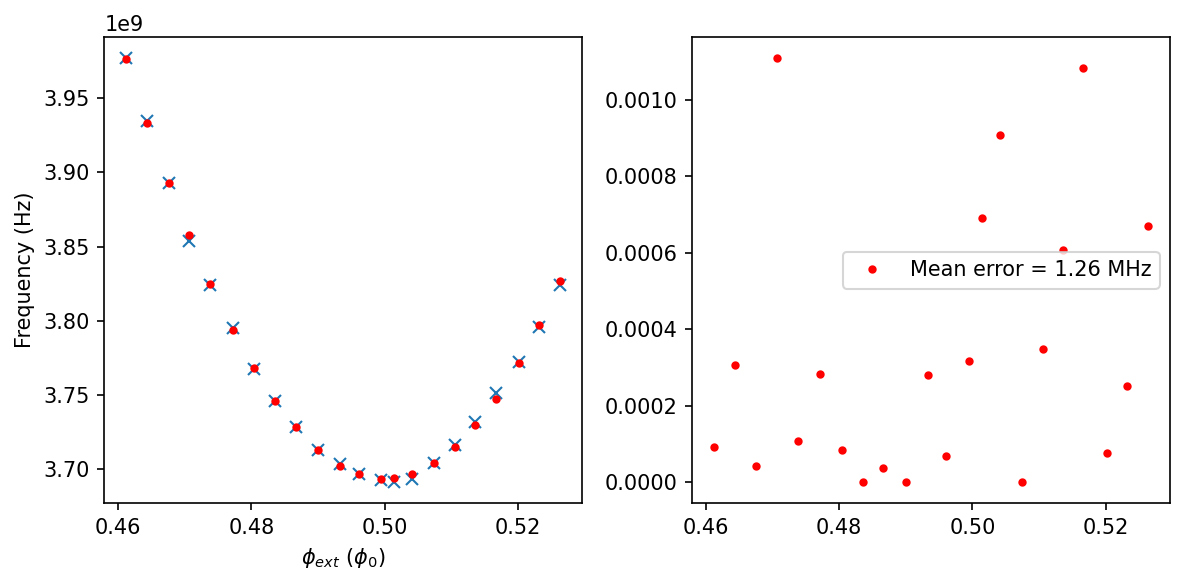

In [37]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')
fig, (ax2, ax3) = plt.subplots(dpi=150, ncols=2, figsize=[4*2,4])
ax2.plot(φ_ext_opt, ω_exp, 'x')
ax2.plot(φ_ext_opt, ω_opt, 'r.')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')

# ax2.set_ylim([3.5e9,4e9])
# ax2.set_xlim([0.45,0.55])

ax3.plot(φ_ext_opt, np.abs(ω_opt-ω_exp)/ω_exp, 'r.' , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz' )
ax3.legend()

fig.tight_layout()

# Resonator 1 

In [130]:
experiment_name = 'resonator_1'
method = 'Nelder-Mead'
load = False

### Load spectral data and theoretical model

In [131]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [132]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

## Guess parameters and set bounds

In [133]:
ω_q = 4704940183.695
μ = 11104205903.012
ω_r = 6470458175.454

g_Φ = 135917251.143
g_q = -125789522.334

# g_Φ = 203875876.7145
# g_q = -66675148.819


I0_guess = I0
I_origin_guess = Iss - I0/2

crossing_index_1  = 13
crossing_index_2  = 10
extra_important_indices = [22, 23, 24]
important_multiplier = 1

parameter_names = ['I0_guess', 'I_origin_guess', 'ω_r', 'g_Φ', 'ω_q', 'μ', 'g_q']
parameters_guess = [I0_guess,  I_origin_guess, ω_r, g_Φ, ω_q, μ, g_q]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, extra_important_indices, important_multiplier])
bounds = fits.create_bounds(parameters_guess, flexible_param_indices=[3,6])

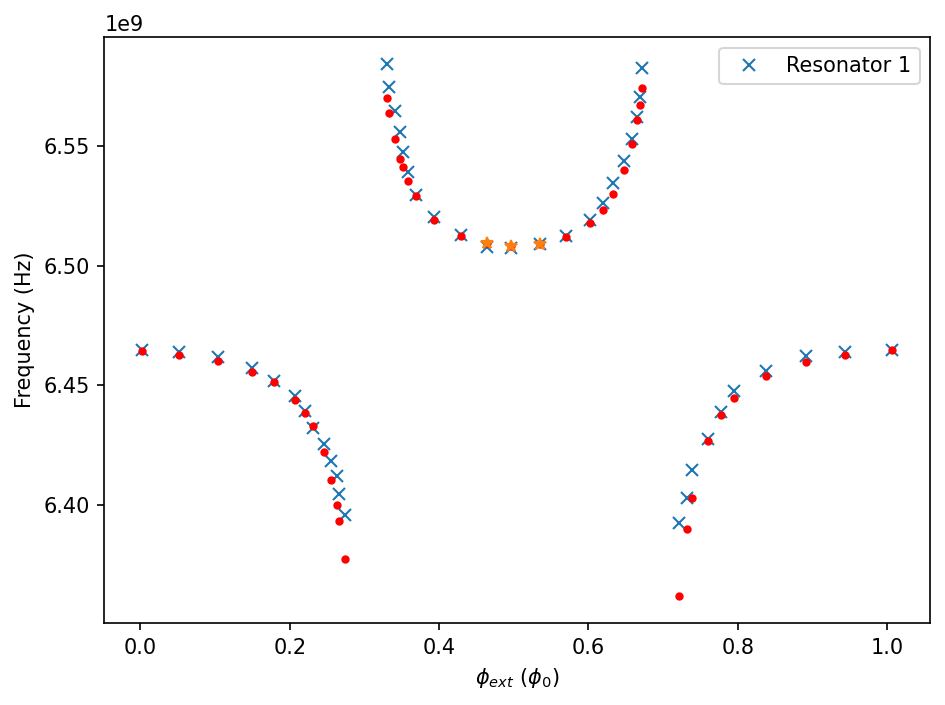

In [134]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_guess, ω_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_guess, ω_guess, '.r')
ax.plot(φ_ext_guess[extra_important_indices], ω_guess[extra_important_indices], '*')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

## Optimize or load previous optimization

In [51]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method = method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.2276985399737215
1.0848358649082488
1.0775880112491998
13.22302816809623
0.1912349502390728
0.39266656839684966
0.23236256070145703
0.20702809706539632
13.087428152039182
6.660385887281726
6.60416293323312
3.271793763924103
3.37376652314538
1.6055885209328202
1.7188354886670074
0.7775852110310946
1.9701614173164845
0.4165235464817104
1.3525246844140586
0.47575560568547726
0.7662224717032681
0.38210783462722875
0.5555793121639356
0.24014370664218426
0.5337185508716479
0.2286606011652889
0.5004869953925877
0.15573075691534327
0.38405306399639605
0.21037172758817674
0.2288468286646862
0.44123236374962427
0.15086694819203472
0.23602176102287484
0.1676246828645525
0.18295697784383105
0.11372150445296383
0.22086427263500594
0.2192417573474159
0.1396115083051691
0.14912759407552623
0.18569983493047523
0.12768023475097942
0.20506858704537964
0.12876888881566811
0.21884824783351803
0.11143314750125981
0.13743757000330545
0.12361393180309105
0.1628438102855911
0.10934018673959255
0.16122156614

In [52]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
error_guess = theoretical_spectrum(parameters_guess, data_set, out='error');
print(f'Error = {error_guess}')
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];
error_opt = theoretical_spectrum(parameters_opt, data_set, out='error');
print(f'Error = {error_opt}')

Guessed parameters 

I0_guess = 3.2100e-03
I_origin_guess = -1.5938e-03
ω_r = 6.4705e+09
g_Φ = 2.0388e+08
ω_q = 4.7049e+09
μ = 1.1104e+10
g_q = -6.6675e+07
0.2276985399737215
Error = 0.2276985399737215


Optimized parameters 

I0_guess = 3.1797e-03
I_origin_guess = -1.5755e-03
ω_r = 6.4668e+09
g_Φ = 2.0174e+08
ω_q = 4.9481e+09
μ = 1.0690e+10
g_q = -5.8628e+07
0.0902844965581007
Error = 0.0902844965581007


## Plot fits and errors

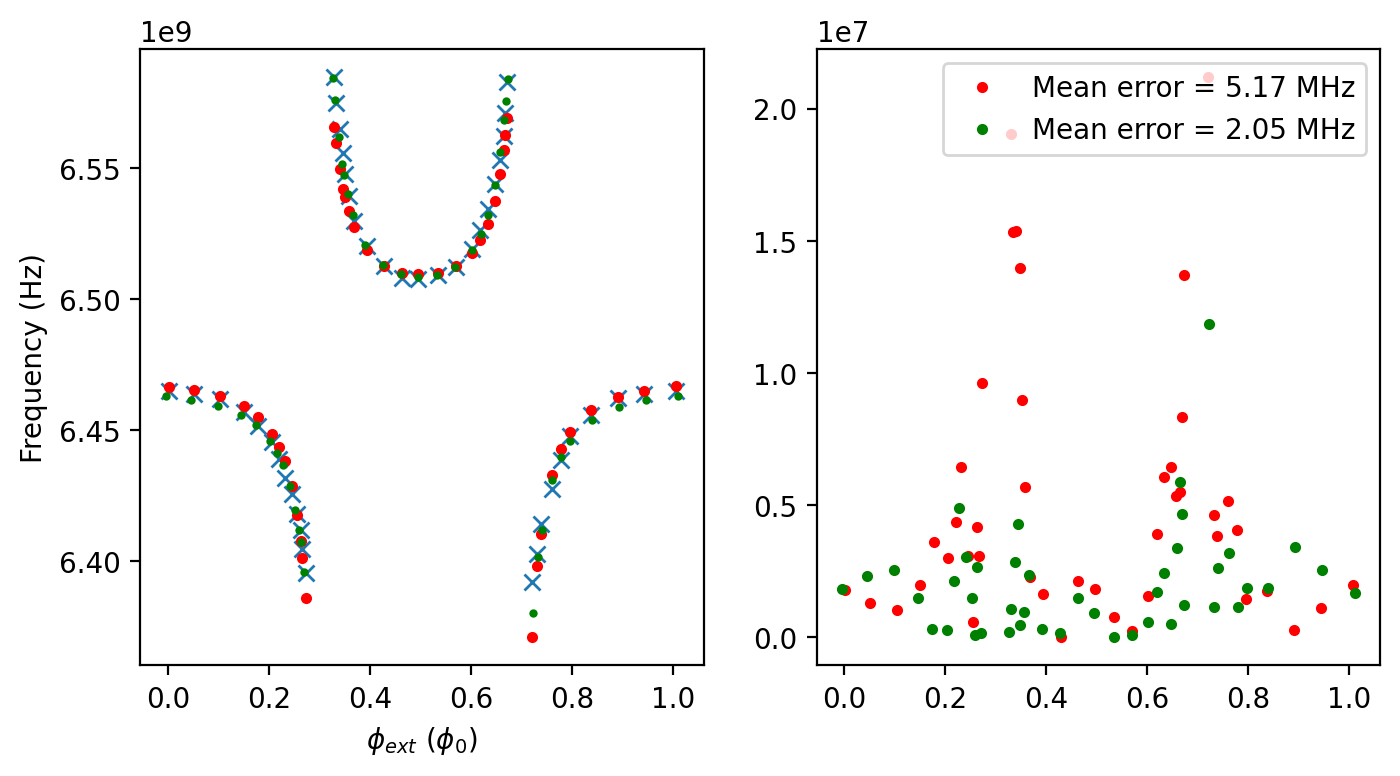

In [53]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess - ω_exp), 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

 # Qubit 1 and Resonator 1 

In [80]:
experiment_name = 'resonator_and_qubit_1'


### Load spectral data and theoretical model

In [81]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F = fits.get_experimental_spectrum('qubit_1')

#Remove the part of the spectrum around phi_ext = 0
φ_ext_exp_F   = φ_ext_exp_F[:22]
ω_exp_F       = ω_exp_F[:22]
I_exp_F       = I_exp_F[:22]

In [82]:
φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = fits.get_experimental_spectrum('resonator_1')

In [83]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

### Guess parameters and set bounds

In [123]:
I0_F, I_origin_F, ω_q, μ = np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
I0_R, I_origin_R, ω_r, g_Φ, _, _, g_q  = np.load(os.getcwd() + opt_dir +  'resonator_1' + '.npz')['parameters_opt']

I0_F = 2.9415e-03
I_origin_F = -1.4591e-03
ω_q = 3.6947e+09
μ = 1.7488e+10
I0_R = 4.0861e-03
I_origin_R = -2.0292e-03
ω_r = 6.4723e+09
g_Φ = 1.3394e+08
g_q = -1.8757e+08

crossing_index_1  = 13
crossing_index_2  = 10
extra_important_indices = [0, 21, 22, 23, 24, 25, 43]
important_multiplier = 10

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1, crossing_index_2, extra_important_indices, important_multiplier])
parameters_guess = [I0_F, I_origin_F, ω_q, μ, I0_R, I_origin_R, ω_r, g_Φ, g_q]

parameter_names = ['I0_F', 'I_origin_F', 'ω_q', 'μ', 'I0_R', 'I_origin_R', 'ω_r', 'g_Φ', 'g_q']

bounds = fits.create_bounds(parameters_guess, flexible_param_indices=[2,3,6,7, 8])

### Plot guess to check

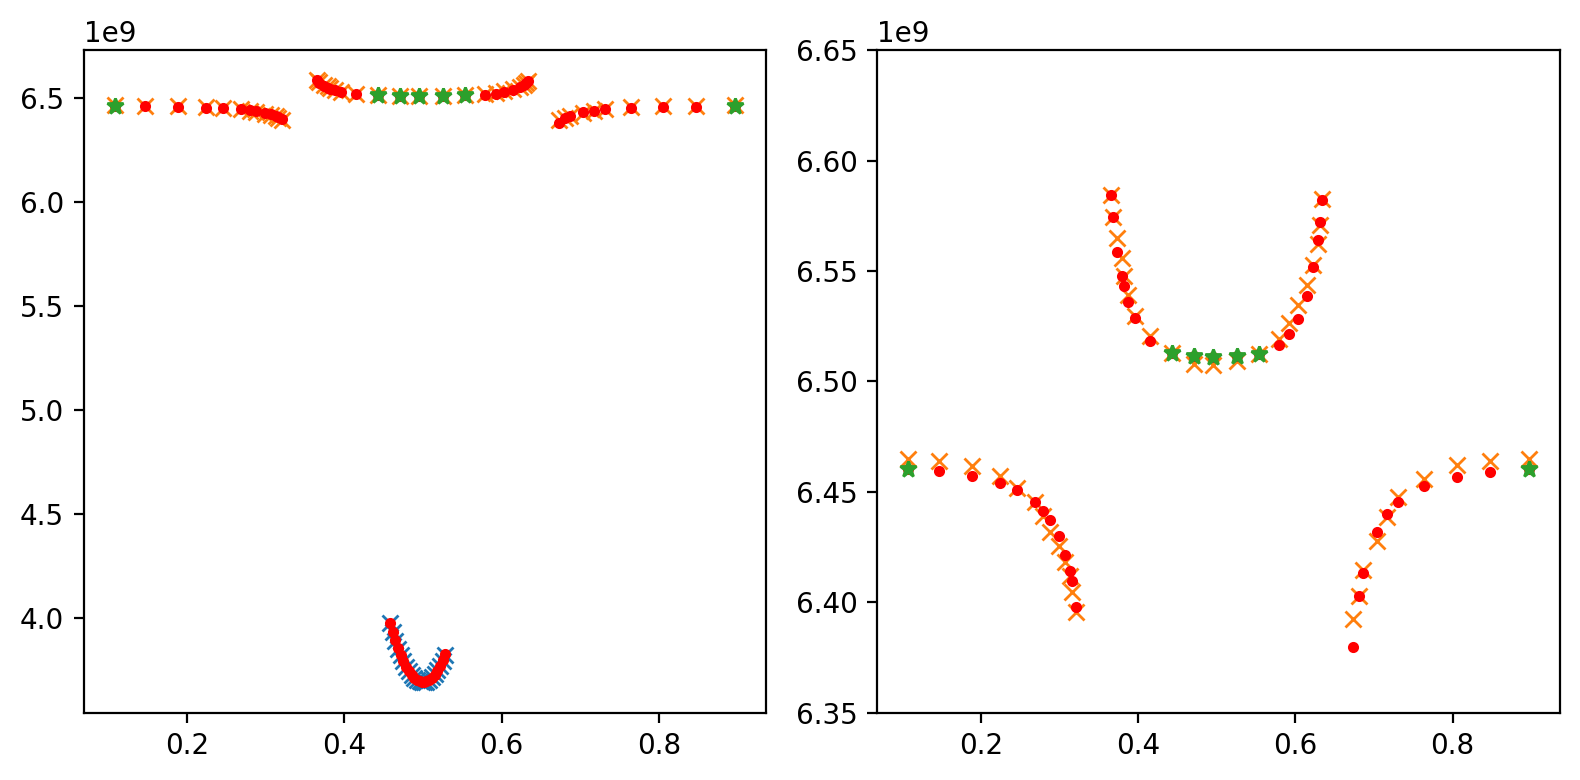

In [124]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_F_guess, ω_exp_F, 'x')
    ax.plot(φ_ext_R_guess, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess[extra_important_indices], ωR_vs_φ_ext_guess[extra_important_indices], '*')
    
ax2.set_ylim([6.35e9,6.65e9])
fig.tight_layout()

### Optimize or load previous optimization

In [125]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.02821392945735693
0.30577345958504676
0.33398738904240366
3.538035354016822
0.30577345958504676
3.8438088136018687
3.281198211228877
0.30577345958504676
3.5869716708139237
3.9888726705058177
0.6578742814473848
4.646746951953203
0.18258201381500483
0.5498712303231363
0.7324532441381412
0.02821392945735693
2.051634714675201
2.079848644132558
0.02821392945735693
1.9983468082424487
2.0265607376998056
0.02821392945735693
33.692456673787916
33.720670603245274
0.02821392945735693
0.4672237237524395
0.4954376532097964
0.02821392945735693
0.3814269598239279
0.40964088928128484
0.8925549179238234
33.28560768344913
34.178162601372954
0.22776782997351838
16.844660267981304
17.072428097954823
0.670936888793231
16.695217450603106
17.36615433939634
0.33855166583678103
8.431800187415664
8.770351853252444
0.5601362168929543
8.344345470107427
8.904481687000382
0.3939456977561393
4.230480458068999
4.624426155825138
3.880478711238727
0.7563704228651666
4.636849134103894
1.9161491311981553
0.593635813273

In [126]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

I0_F = 2.8991e-03
I_origin_F = -1.4381e-03
ω_q = 3.6936e+09
μ = 1.7475e+10
I0_R = 4.0869e-03
I_origin_R = -2.0280e-03
ω_r = 6.4643e+09
g_Φ = 2.7173e+08
g_q = -1.0264e+08


Optimized parameters 

I0_F = 2.9415e-03
I_origin_F = -1.4591e-03
ω_q = 3.6947e+09
μ = 1.7488e+10
I0_R = 4.0861e-03
I_origin_R = -2.0292e-03
ω_r = 6.4723e+09
g_Φ = 1.3394e+08
g_q = -1.8757e+08


### Plot fits and errors

(6400000000.0, 6620000000.0)

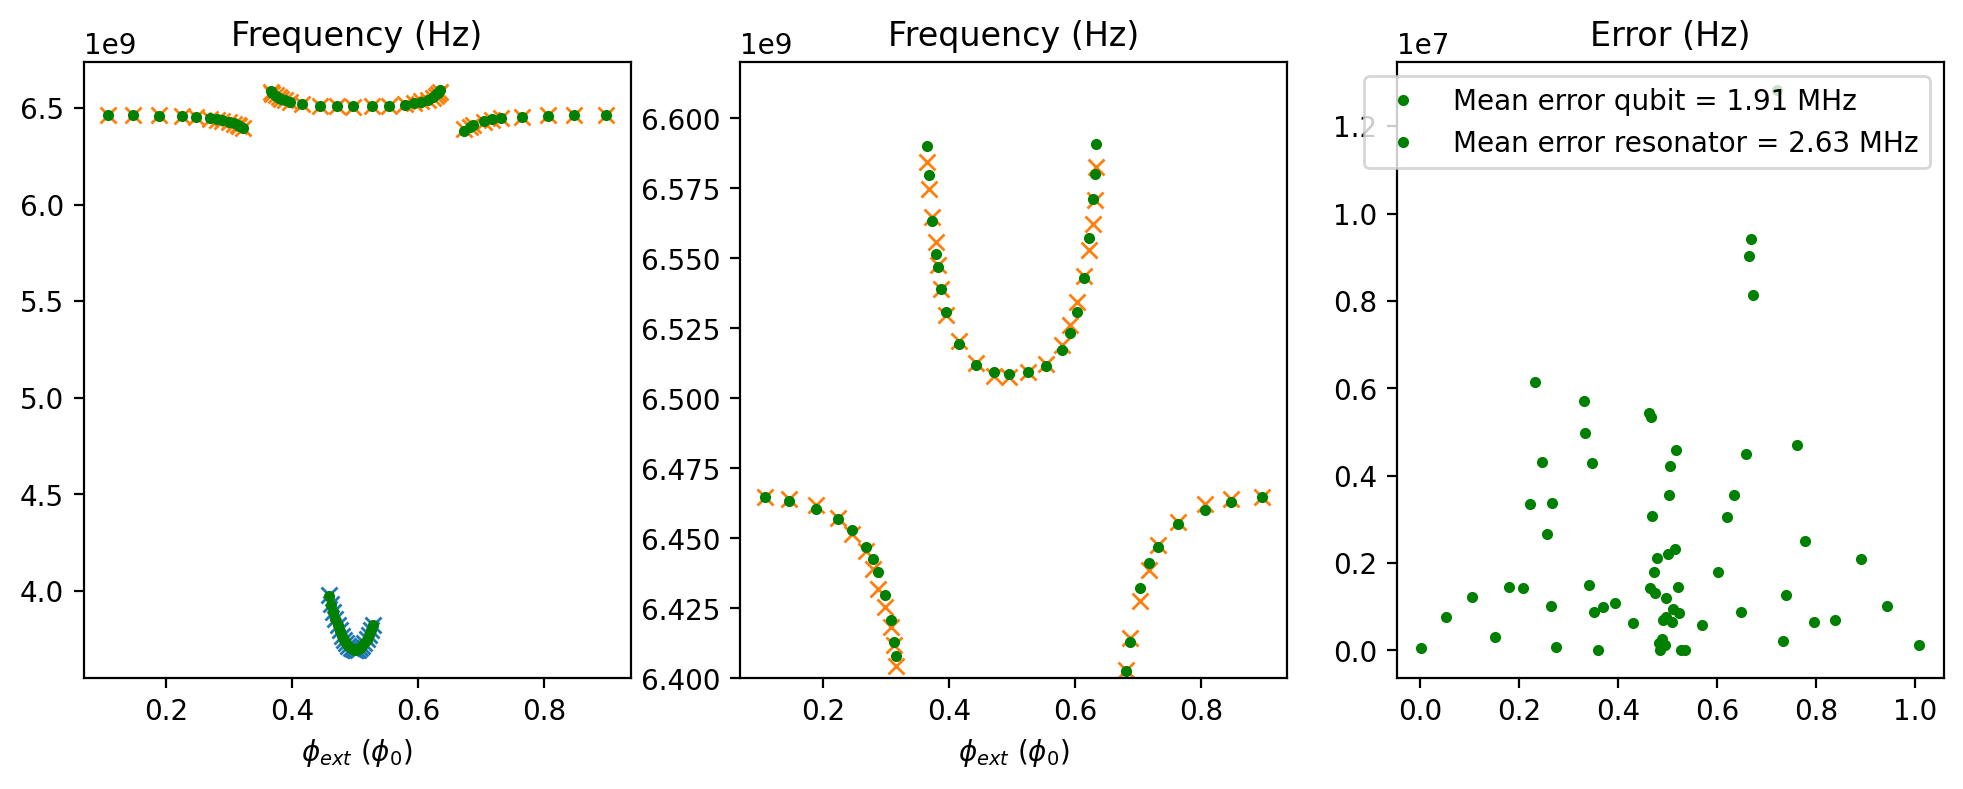

In [127]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_F_opt     , ω_exp_F   , 'x')
    ax.plot(φ_ext_R_opt     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.' , label = f'Mean error qubit = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.' , label = f'Mean error resonator = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3. legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.4e9,6.62e9])


# Qubit 2

In [198]:
experiment_name = 'qubit_2'
load = False


### Load spectral data and theoretical model

In [199]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

#Remove the part of the spectrum around phi_ext = 0
φ_ext_exp = φ_ext_exp[:20]
ω_exp = ω_exp[:20]
I_exp = I_exp[:20]

In [200]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

## Guess parameters and set bounds

In [201]:
ω_q = 3.45 * GHz
μ = 35 * GHz

I0_guess = I0
I_origin_guess = Iss - I0/2
parameters_guess = [I0_guess, I_origin_guess, ω_q, μ]
parameter_names = ['I0', 'I_origin', 'ω_q_2', 'μ_2']
bounds = fits.create_bounds(parameters_guess)
data_set = ([I_exp, ω_exp])

(0.45, 0.55)

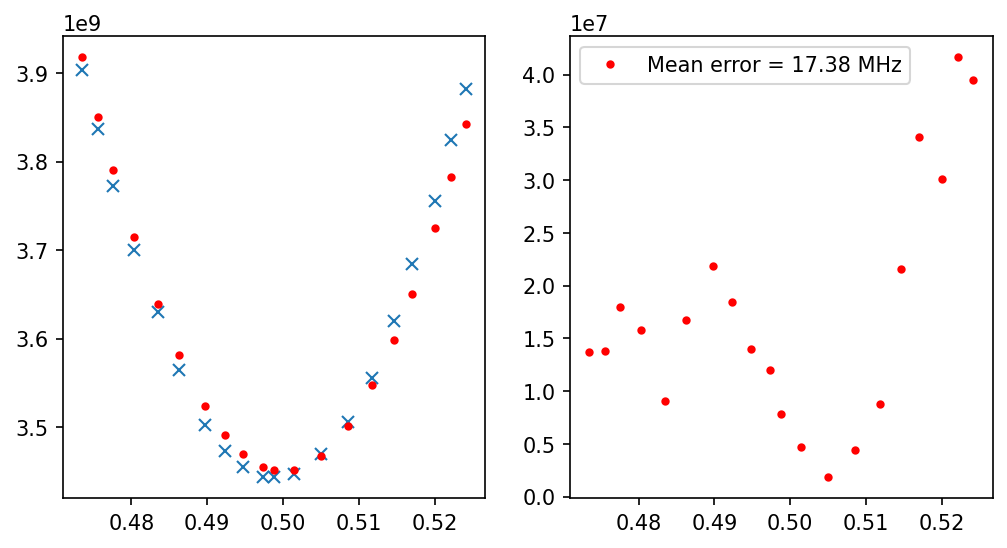

In [207]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols = 2, figsize=[8,4])
ax1.plot(φ_ext_guess, ω_exp, 'x')
ax1.plot(φ_ext_guess, ω_guess, 'r.')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess   - ω_exp), 'r.'   , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()
ax.set_ylim([3.4e9,4e9])
ax.set_xlim([0.45,0.55])

## Optimize or load previous optimization

In [203]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='Nelder-Mead').x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.3475535832699475
3.2819570756718077
0.39168619503405955
9.99617875600816
24.459225359335438
40.38088736339292
8.028832235328975
18.608380389875553
4.082203328215526
12.313344042147108
3.2364132021851164
6.020026736782178
1.9107556668679553
2.4216838738947404
4.125969978086828
1.3494100032946215
3.1614656960226544
1.0926248045258111
2.4017858845026234
0.8297602881137524
2.0000186083077116
0.520336578466969
1.4066940995249209
0.4815122286726985
0.7729360711785122
0.370559227993443
0.7322382323518238
0.21457327141951657
0.484813565017108
0.24009938366645384
0.5636359182709174
0.16169583712058783
0.49419068058174037
0.17179459471920394
0.4968836207425957
0.15565012514074184
0.16254559419149447
0.29451165668583634
0.10984977785488272
0.29544626545783187
0.08400760407175255
0.1842091318519063
0.09625030390094995
0.16807714199273252
0.0981490276624813
0.18774970421329354
0.09069674190390205
0.1537667055265112
0.07876964557964611
0.11773117668638897
0.06989299400055361
0.10909864980440187
0.

In [204]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

ω_q_2 = 3450000000.000
μ_2 = 35000000000.000
I0 = 0.005
I_origin = -0.005


Optimized parameters 

ω_q_2 = 3442906502.431
μ_2 = 35937439106.831
I0 = 0.005
I_origin = -0.005


## Plot fits and errors

(0.45, 0.55)

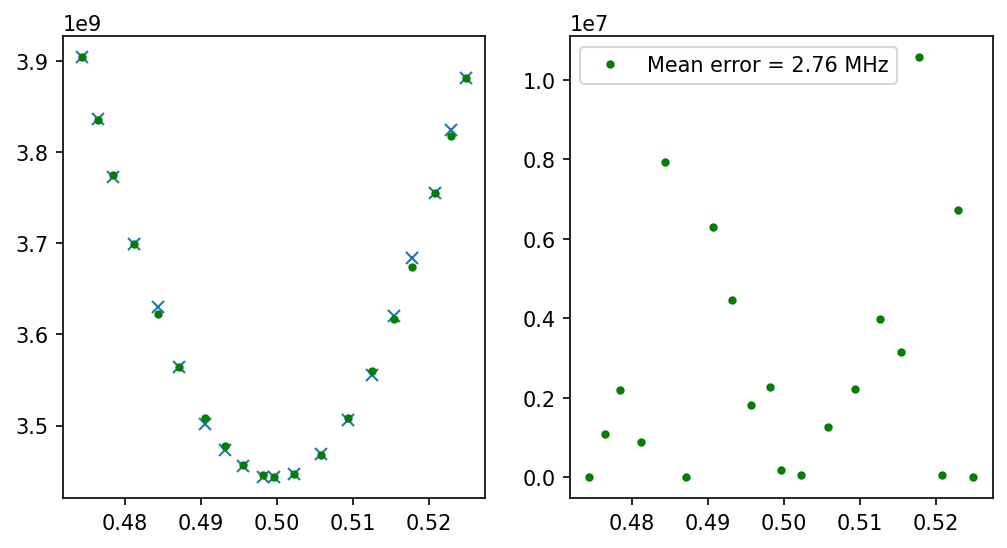

In [206]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols = 2, figsize=[8,4])
ax1.plot(φ_ext_opt, ω_exp, 'x')
ax1.plot(φ_ext_opt, ω_opt, 'g.')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()
ax.set_ylim([3.4e9,4e9])
ax.set_xlim([0.45,0.55])

# Resonator 2

In [77]:
experiment_name = 'resonator_2'

## Load spectral data and theoretical model

In [78]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [79]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

## Guess parameters and set bounds

In [80]:
ω_q = 2203615237.814
μ = 35529670364.808
ω_r = 6273261008.530
g_Φ = 128007201.473

I0_guess = I0
I_origin_guess = Iss - I0/2
crossing_index_1  = 11
crossing_index_2  = 9
extra_important_indices = [17, 18, 19]
important_multiplier = 1

parameter_names = ['I0_guess', 'I_origin_guess', 'ω_r', 'g_Φ',  'ω_q', 'μ']
parameters_guess = [I0_guess,  I_origin_guess,  ω_r,  g_Φ,  ω_q,   μ ]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, extra_important_indices, important_multiplier])
bounds = fits.create_bounds(parameters_guess)

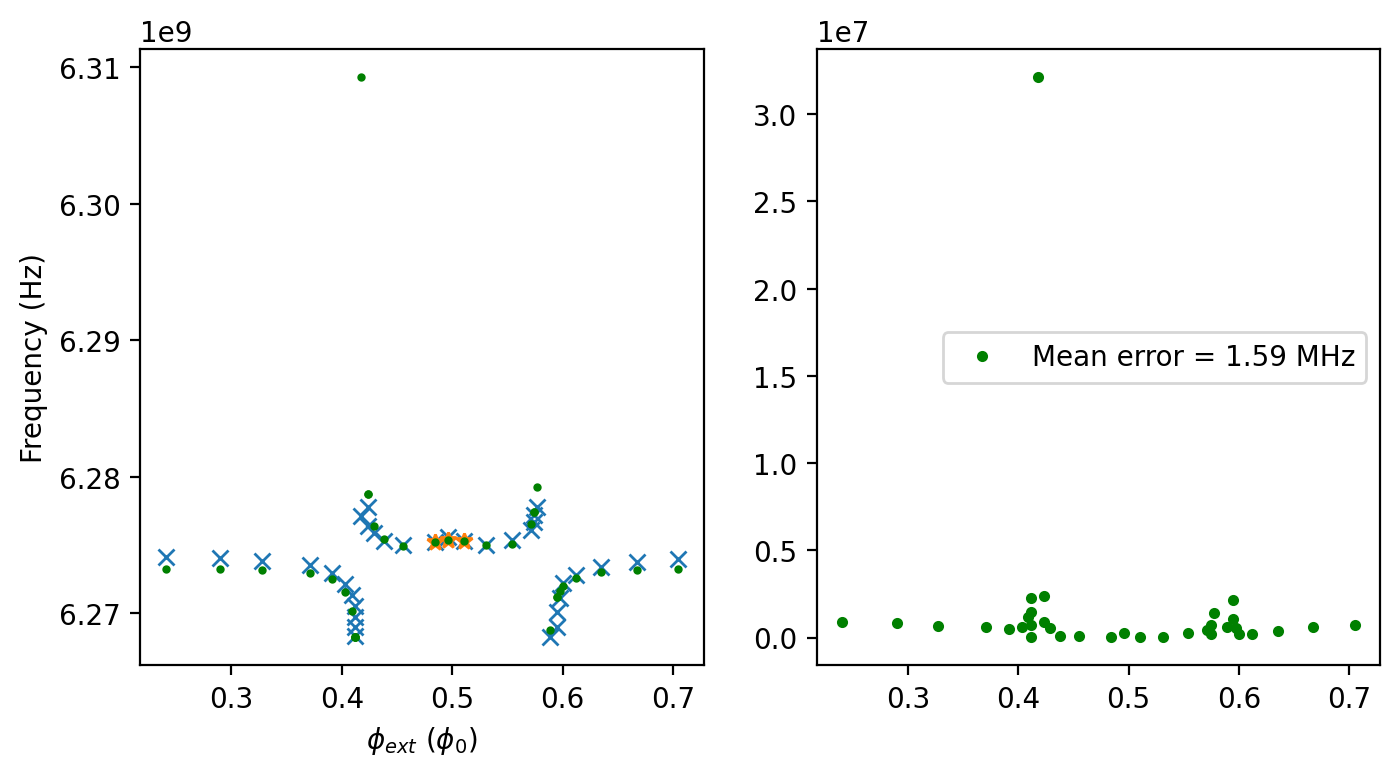

In [81]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_guess, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess[extra_important_indices], ω_guess[extra_important_indices], '*')
ax1.plot(φ_ext_guess, ω_guess, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

## Optimize or load previous optimization

In [111]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method = method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.043808943821059224
0.06853059272799587
0.28236694460659406
7.8146444241198605
0.047837292582757
5.0398021600234335
0.12106141294535827
7.98201884267478
3.928785107303501
5.093026505868542
1.575659017254429
3.8772476312107513
2.006393778061387
2.066525322085475
1.0713281292805108
1.4979298386122255
0.5113834076421814
0.8102543587789364
0.380772699507864
0.7929944471114044
0.1740156367080164
0.5560209033901262
0.19967971335372925
0.024408212247011184
0.10601830580525494
0.23217347034735583
0.09603330925026513
0.23192258043575859
0.09411172890996837
0.029986784348234177
0.10461350278524303
0.04721144828333855
0.08812886135856819
0.052946588415566445
0.02601123231257534
0.0422897057925415
0.020677851234950067
0.028481042816809653
0.04358613881695175
0.049042404316592215
0.024343852856626512
0.040384776864803316
0.046126916537522315
0.027410391826459886
0.03892506098477459
0.026900453589694024
0.020341320910461425
0.05114127796999645
0.021882160885020256
0.026671198907779695
0.02047136749

In [112]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

ω_q = 2203615237.814
μ = 35529670364.808
ω_r = 6273261008.530
g_Φ = 128007201.473
I0_guess = 0.005
I_origin_guess = 0.000


Optimized parameters 

ω_q = 1853181347.469
μ = 34743583379.767
ω_r = 6273863644.238
g_Φ = 126635783.090
I0_guess = 0.005
I_origin_guess = 0.000


## Plot fits and errors

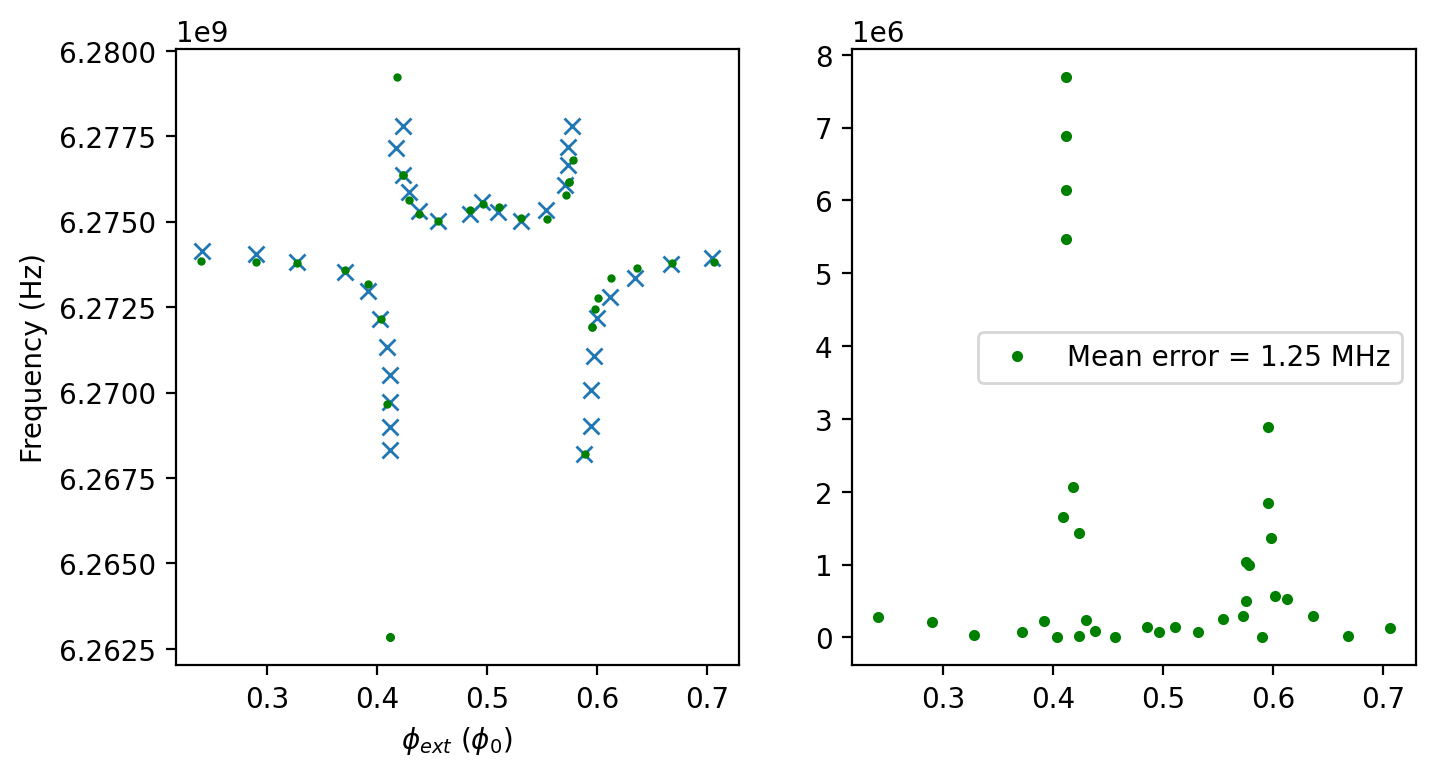

In [113]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

# Qubit 2 and Resonator 2

In [386]:
experiment_name = 'resonator_and_qubit_2'


### Load spectral data and theoretical model

In [387]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F = fits.get_experimental_spectrum('qubit_2')
φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = fits.get_experimental_spectrum('resonator_2')

In [388]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [389]:
CF_2, LF_2, EJ_2, I0_F_2, I_origin_F_2= np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']
CR_2, LR_2, Δ_2, I0_R_2, I_origin_R_2 = np.load(os.getcwd() + opt_dir +  'resonator_2' + '.npz')['parameters_opt']

crossing_index_1_F = 20
crossing_index_1_R = 11
crossing_index_2_R = 9
nmax_r = 5
nmax_f = 15

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_2, LF_2, EJ_2, I0_F_2, I_origin_F_2, CR_2, LR_2, Δ_2,  I0_R_2, I_origin_R_2]
parameter_names = ['CF_2', 'LF_2', 'EJ_2', 'I0_F_2', 'I_origin_F_2',
                   'CR_2', 'LR_2', 'Δ_2', 'I0_R_2', 'I_origin_R_2']
bounds = fits.create_bounds(parameters_guess)

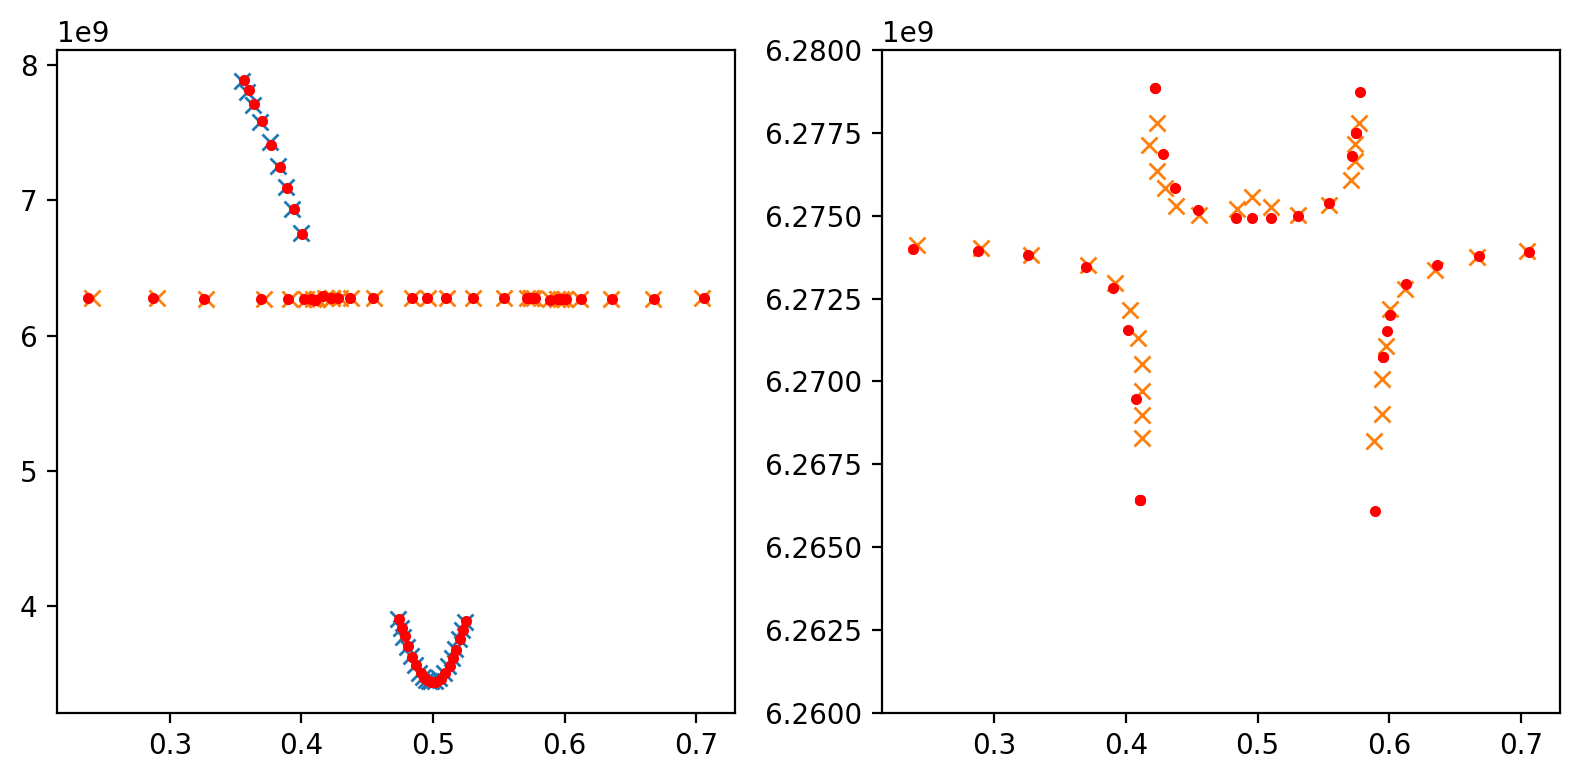

In [390]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.26e9,6.28e9])
fig.tight_layout()

### Optimize or load previous optimization

In [391]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.190610322650691
0.190610330359807
0.19061034089221662
0.19061035322957176
0.1906877977195145
0.19075779748056787
0.19061033011053263
0.19061032310986947
0.19061033288398788
0.19061048249143964
0.19061068675862414
98.90188812523571
19.46551636249828
1.715290546096052
0.24566781211181388
0.18897751240903427
0.18897751706533894
0.18897752412940205
0.18897753391551708
0.18895344940201886
0.18893084916429492
0.188977475811964
0.18897751009161068
0.18897752234685905
0.18897749318334833
0.1889774885881832
71.04174377567429
5.679684121546066
0.5570837081278976
0.19677571822790396
0.1891648678887452
0.18851910802950966
0.18851910628789215
0.18851910498332947
0.18851910544478345
0.18840770892519698
0.18838512059323298
0.1885191301293303
0.18851910941111383
0.18851911772002294
0.1885190228727125
0.18851889450026293
78.31045943751374
5.4961197202917145
0.4624470304268127
0.19095353154704542
0.1871382347851136
0.18713823304932875
0.18713823174101263
0.187138232171566
0.1869937653749809
0.18686264

In [392]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_2 = 22.758
LF_2 = 20.141
EJ_2 = 9.592
I0_F_2 = 0.005
I_origin_F_2 = -0.005
CR_2 = 6.368
LR_2 = 101.043
Δ_2 = 0.224
I0_R_2 = 0.005
I_origin_R_2 = 0.000


Optimized parameters 

CF_2 = 22.754
LF_2 = 20.143
EJ_2 = 9.589
I0_F_2 = 0.005
I_origin_F_2 = -0.005
CR_2 = 6.368
LR_2 = 101.043
Δ_2 = 0.224
I0_R_2 = 0.005
I_origin_R_2 = 0.000


### Plot fits and errors

(6265000000.0, 6280000000.0)

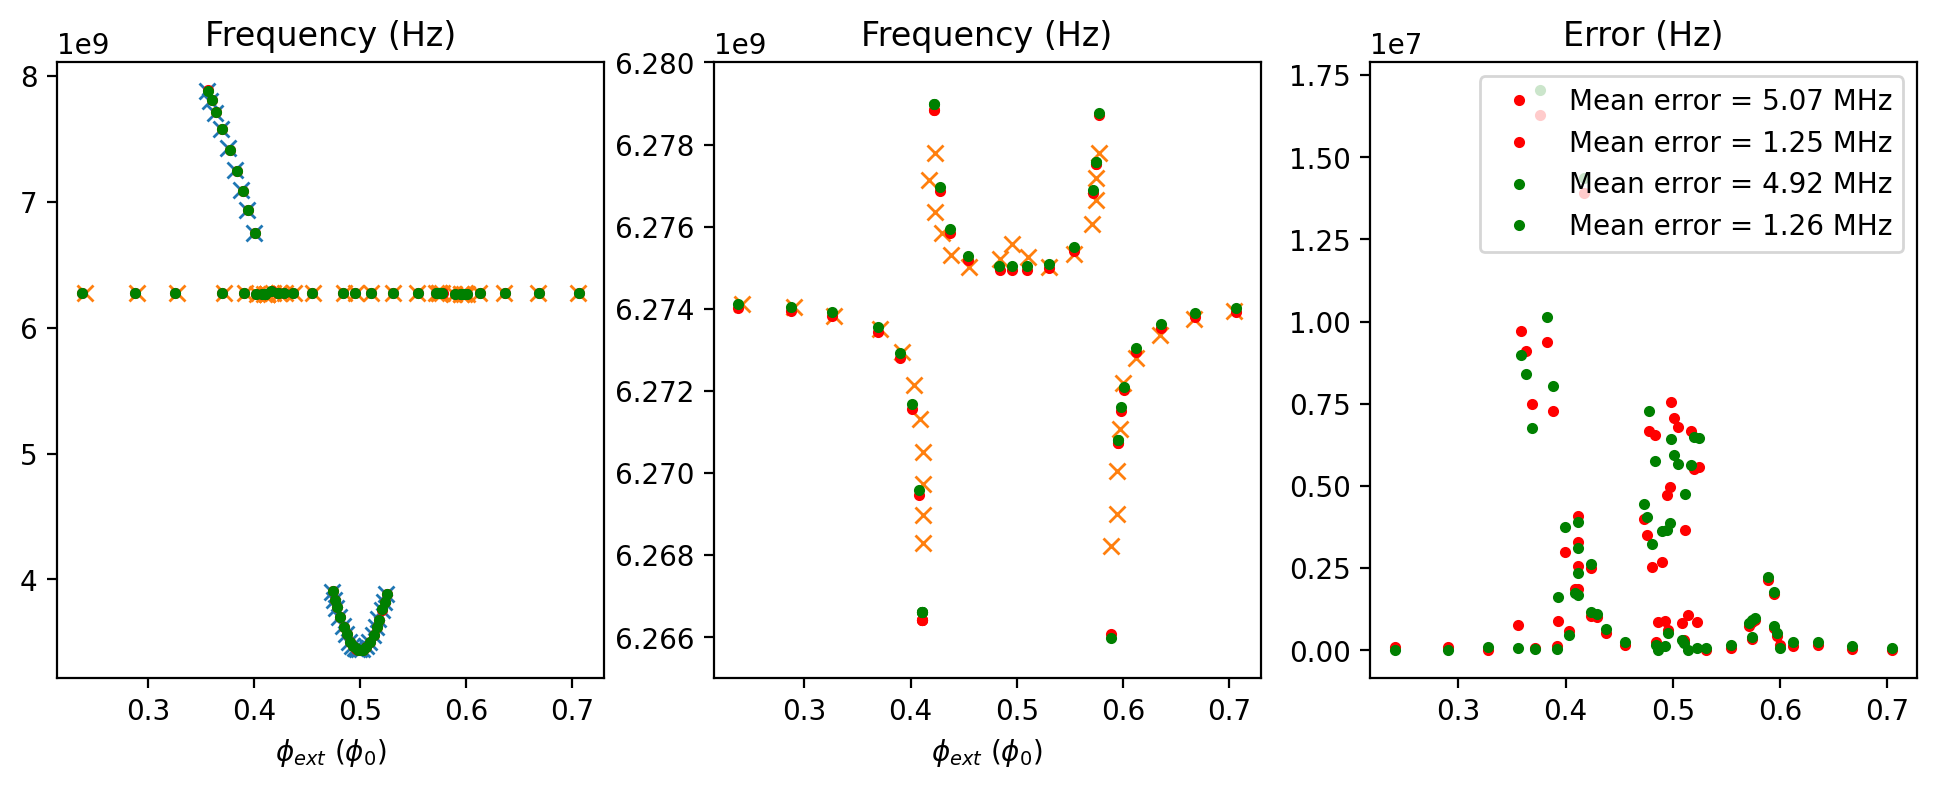

In [395]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.265e9,6.28e9])



# Qubit 3

In [32]:
experiment_name = 'qubit_3'
load = False
method = 'Nelder-Mead'


### Load spectral data and theoretical model

In [33]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

#Remove the part of the spectrum around phi_ext = 0
φ_ext_exp   = φ_ext_exp [:24]
ω_exp       = ω_exp     [:24]
I_exp       = I_exp     [:24]

In [34]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

## Guess parameters and set bounds

In [41]:
ω_q = 3.0855 * GHz
μ = 21.388 * GHz

I0_guess = I0
I_origin_guess = Iss - I0/2
parameters_guess = [I0_guess, I_origin_guess, ω_q, μ]
parameter_names = ['I0', 'I_origin', 'ω_q_3', 'μ_3']
bounds = fits.create_bounds(parameters_guess)
data_set = ([I_exp, ω_exp])

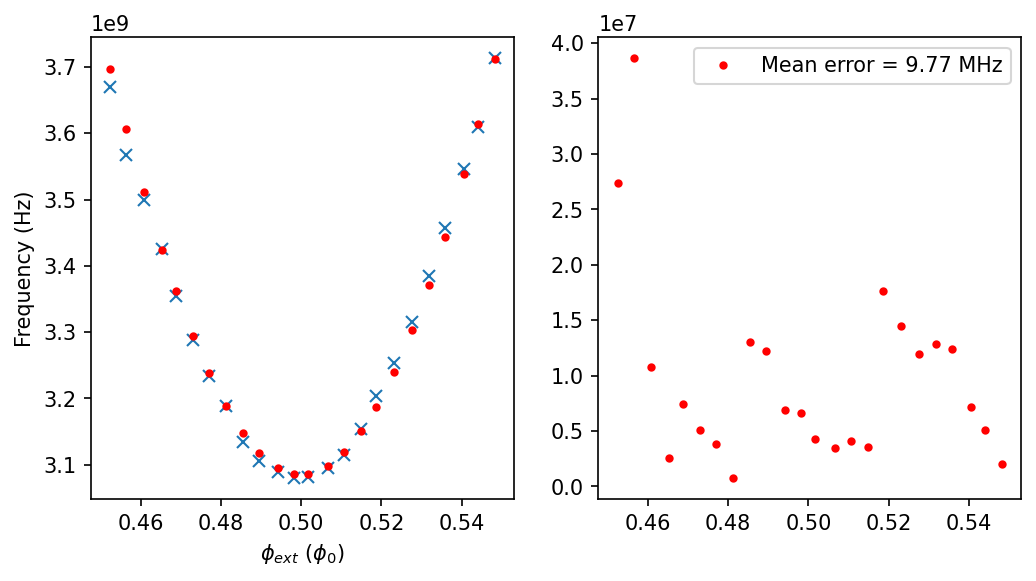

In [42]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols = 2, figsize=[8,4])
ax1.plot(φ_ext_guess, ω_exp, 'x')
ax1.plot(φ_ext_guess, ω_guess, 'r.')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')
# ax1.set_ylim([3.4e9,4e9])
# ax1.set_xlim([0.45,0.55])

ax2.plot(φ_ext_guess, np.abs(ω_guess   - ω_exp), 'r.'   , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()


## Optimize or load previous optimization

In [43]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method, tol = 1e-14).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.23437637943138886
3.5292007642853216
0.6145404523509116
7.796595579647698
10.270008369047726
15.933552203335282
3.8844377071664016
12.398134793911915
3.69369345829058
6.474859279559862
1.5453890792925535
4.896963491445191
1.900797147072298
2.3713126220024856
0.9452186519520211
2.3692342986949297
0.8670814369400038
2.246521747741336
0.6362374928222246
1.6886305614037642
0.4061806433827605
0.840093255114562
0.45348208970183657
0.7199736753017297
0.37680016555184126
0.5058676604982981
0.30105652311869907
0.36722718790124037
0.29452758535720347
0.4204780057964978
0.22787883949105978
0.5188397284300313
0.20635456281540204
0.43954919777967216
0.18172382881870078
0.3504092470310831
0.19864595371718408
0.25326791026415585
0.18202396343085145
0.24270686593526078
0.18410790016349363
0.27769105077018263
0.17767215039654732
0.21591459184752465
0.1826300331394291
0.18777118735477447
0.17788478455064727
0.18110640987239504
0.18456324323361445
0.17352717960083341
0.21630431850763177
0.1764811365673

In [44]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

ω_q_3 = 3085500000.000
μ_3 = 21388000000.000
I0 = 0.002
I_origin = -0.001


Optimized parameters 

ω_q_3 = 3085582547.762
μ_3 = 21378945914.762
I0 = 0.002
I_origin = -0.001


## Plot fits and errors

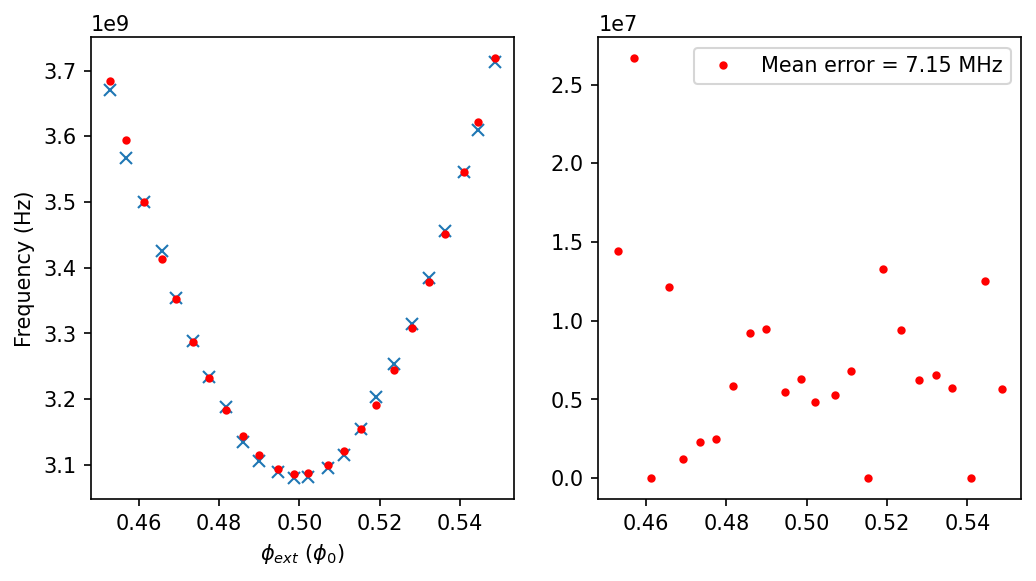

In [45]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols = 2, figsize=[8,4])
ax1.plot(φ_ext_opt, ω_exp, 'x')
ax1.plot(φ_ext_opt, ω_opt, 'r.')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')
# ax1.set_ylim([3.4e9,4e9])
# ax1.set_xlim([0.45,0.55])

ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'r.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

# Resonator 3

In [82]:
experiment_name = 'resonator_3'
load = False

### Load spectral data and theoretical model

In [83]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [84]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

## Guess parameters and set bounds

In [91]:
ω_q, μ, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']
ω_r = sq_ext.get_experimental_parameters(experiment_name, return_effective=True)[-1]
ω_r *= GHz

In [126]:
ω_q = 4974344974.627
μ   = 6671402940.200
ω_r = 5219024255.425
g_Φ = 21806315.357
g_q = 66675148.819

I0_guess = I0
I_origin_guess = Iss - I0/2
crossing_index_1  = 10
crossing_index_2  = 8
extra_important_indices = [14, 15, 16]
important_multiplier = 1

parameter_names = ['I0_guess', 'I_origin_guess', 'ω_q', 'μ', 'ω_r', 'g_Φ', 'g_q' ]
parameters_guess = [I0_guess,  I_origin_guess, ω_q,   μ,   ω_r,  g_Φ, g_q ]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, extra_important_indices, important_multiplier])
bounds = fits.create_bounds(parameters_guess, flexible_param_indices=[3,4])

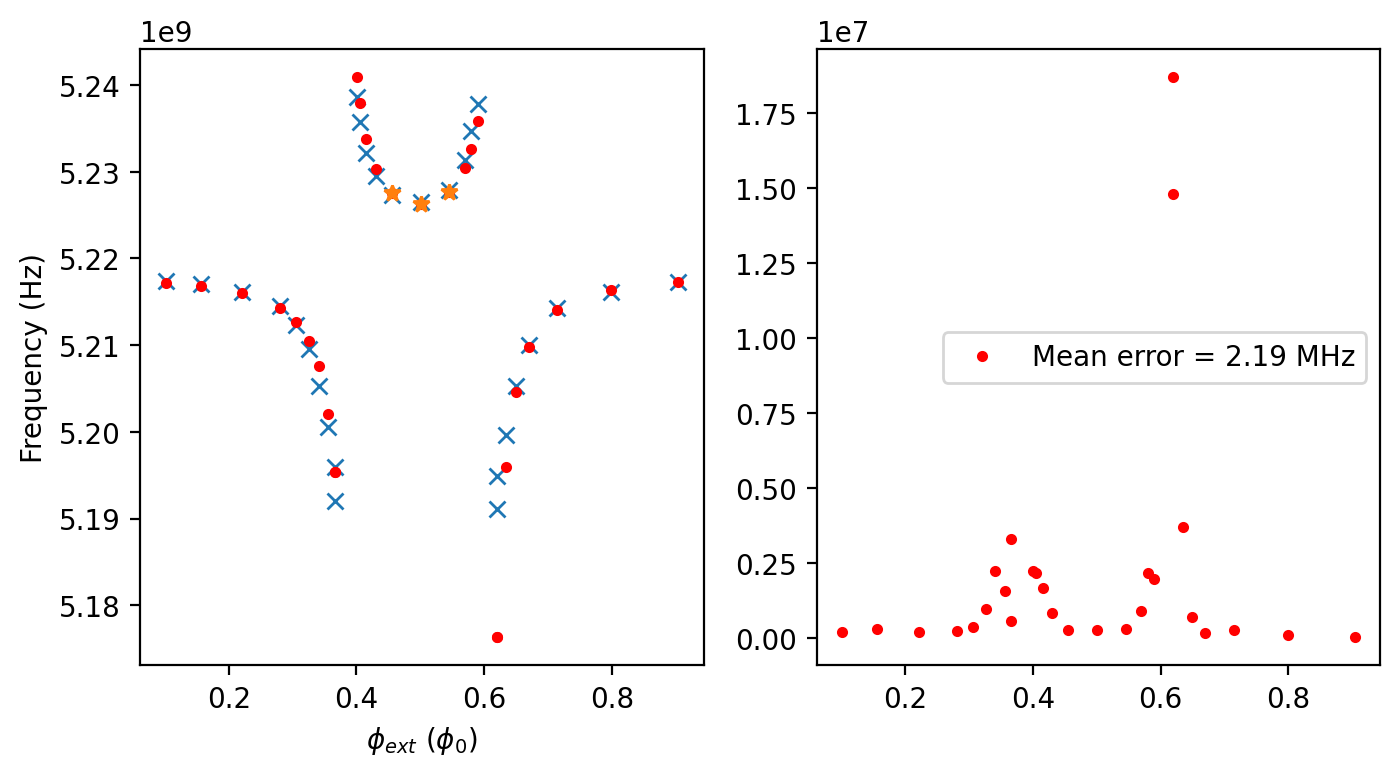

In [127]:
φ_ext_guess , ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_guess, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r')
ax1.plot(φ_ext_guess[extra_important_indices], ω_guess[extra_important_indices], '*')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess - ω_exp), 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax2.legend()

## Optimize or load previous optimization

In [128]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method = method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.02405559020476246
1.0891976521866389
0.03503276841838169
5.5559094321613465
0.02365213100439358
0.03680233744196415
0.2123814122573452
0.08080744837119103
4.386260418587692
2.4900839662070187
2.945058023856596
1.307694594083784
1.5100645837337618
0.6435371231601086
0.7145236654022322
0.3309762404376259
0.6095349747893772
0.28931849885553457
0.4570999746073837
0.13814800146606349
0.29990201439531805
0.14041237176092244
0.17283631193196297
0.06444877428565789
0.15712518941727066
0.06335147892026806
0.18129525667956828
0.05944567840657711
0.11247364388526153
0.03371981936334801
0.0962849969585247
0.02682964995802498
0.06197410855049419
0.03220193857786751
0.06780894716532707
0.02934744867228508
0.03829538899006939
0.019051321009937287
0.048980817186062814
0.018617039650793074
0.05777610521655083
0.014433367159497262
0.03386876348074722
0.01840325975000286
0.030267954605291365
0.016165440559324264
0.05448728158445645
0.011446437697024345
0.01625155802016163
0.025453714936312676
0.0151131

In [124]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

ω_q = 4974990913.243
μ = 6676114040.881
ω_r = 5219005592.962
g_Φ = 21478967.315
g_q = 66238461.648
I0_guess = 0.002
I_origin_guess = -0.001


Optimized parameters 

ω_q = 4974344974.627
μ = 6671402940.200
ω_r = 5219024255.425
g_Φ = 21806315.357
g_q = 66675148.819
I0_guess = 0.002
I_origin_guess = -0.001


## Plot fits and errors

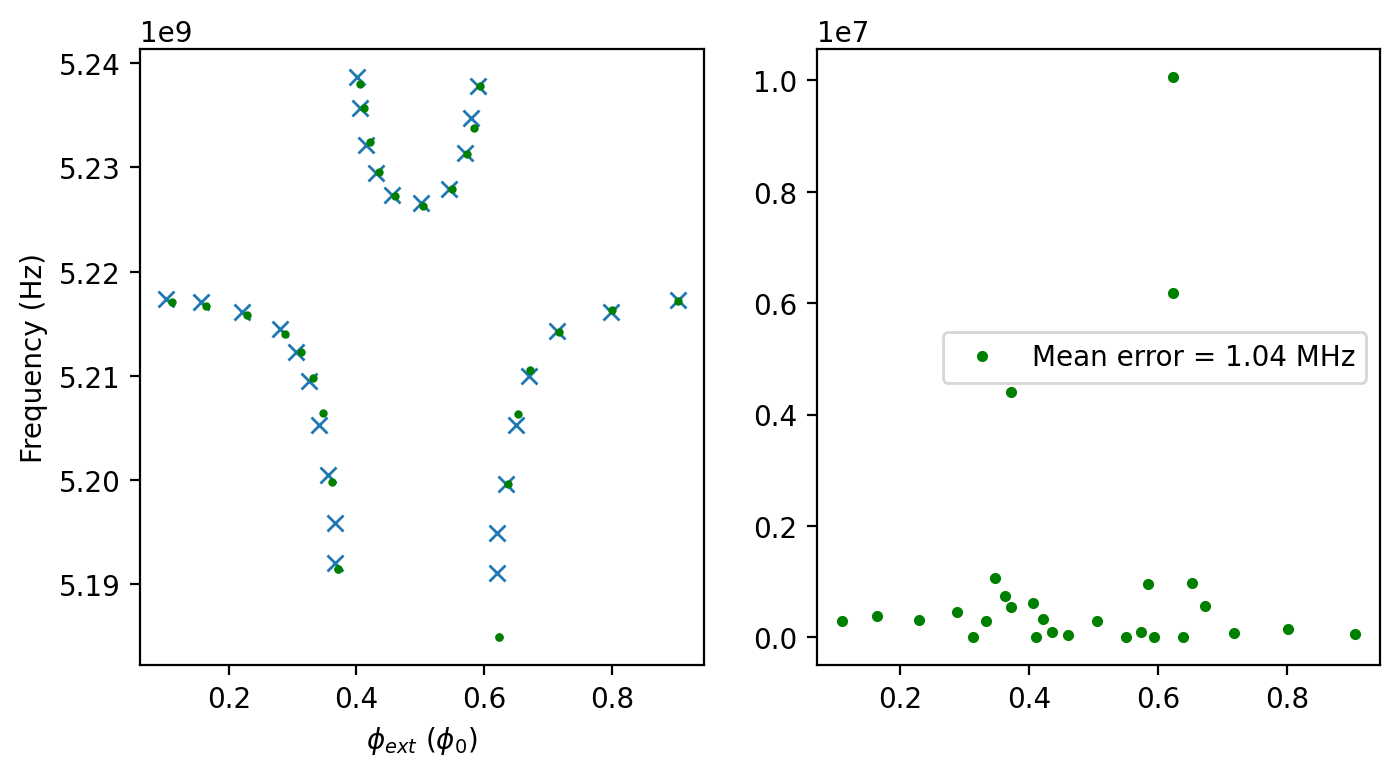

In [130]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

# Qubit 3 and Resonator 3

In [273]:
experiment_name = 'resonator_and_qubit_3'


### Load spectral data and theoretical model

In [274]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F = fits.get_experimental_spectrum('qubit_3')
φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = fits.get_experimental_spectrum('resonator_3')

In [275]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [276]:
CF_3, LF_3, EJ_3, I0_F_3, I_origin_F_3= np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']
C_int_33, CR_3, LR_3, I0_R_3, I_origin_R_3 = np.load(os.getcwd() + opt_dir +  'resonator_3' + '.npz')['parameters_opt']

crossing_index_1_F = 22
crossing_index_1_F = 24
crossing_index_1_R = 10
crossing_index_2_R = 8
nmax_r = 5
nmax_f = 15
# C_int = 500

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, Δ_3, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_3, LF_3, EJ_3, I0_F_3, I_origin_F_3, C_int_33, CR_3, LR_3, I0_R_3, I_origin_R_3]

parameter_names = ['CF_3', 'LF_3', 'EJ_3', 'I0_F_3', 'I_origin_F_3',
                   'C_int_33', 'CR_3', 'LR_3', 'I0_R_3', 'I_origin_R_3']

bounds = ((20,30), (20,30), (4,15), (I0_F_3*0.9, I0_F_3*1.1), (I_origin_F_3*1.1, I_origin_F_3*0.9),
          (10, 1000), (2,25), (30,170), (I0_R_3*0.9, I0_R_3*1.1), (I_origin_R_3*1.1, I_origin_R_3*0.9))

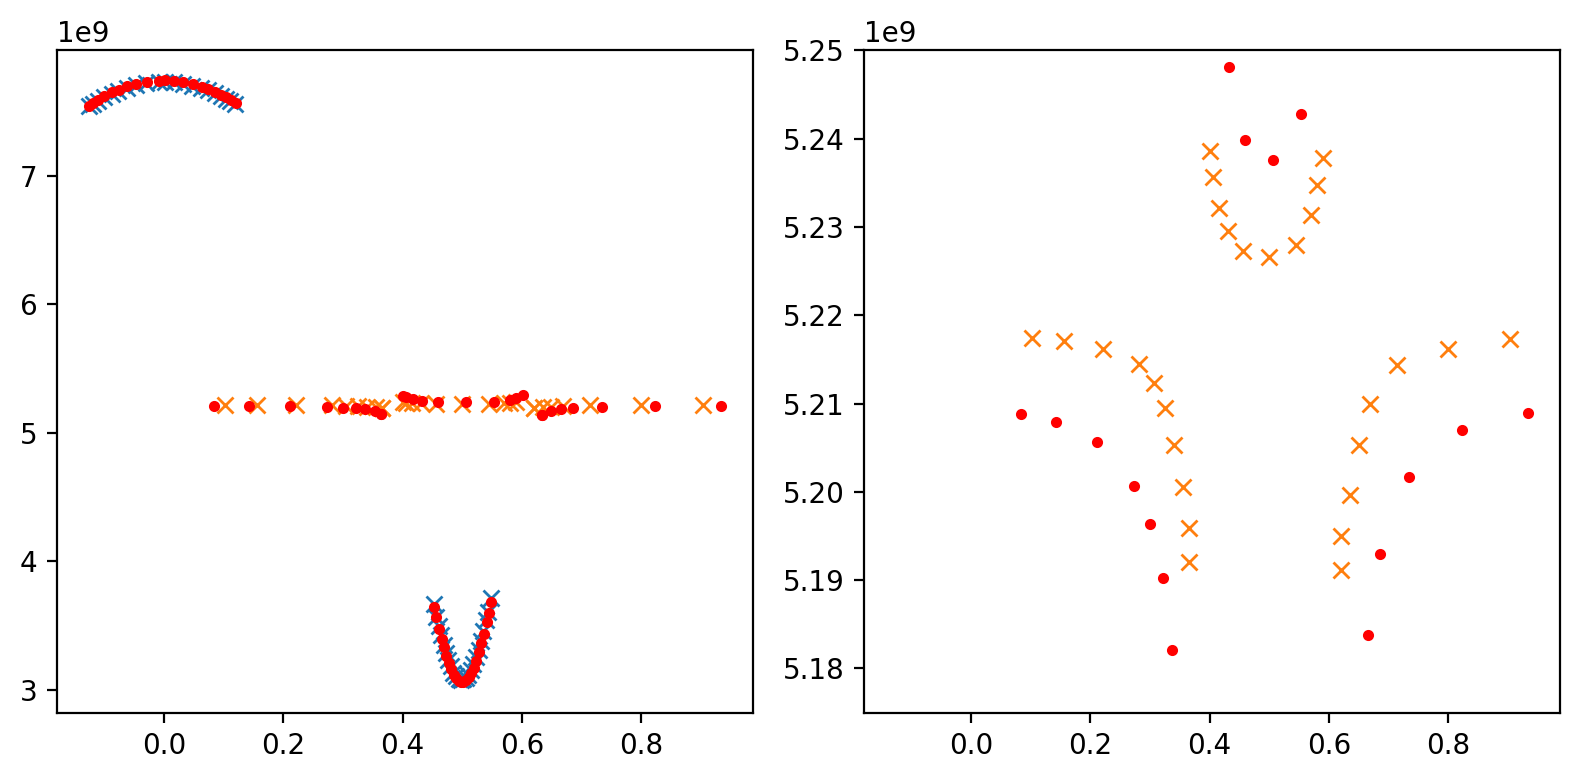

In [277]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([5.175e9,5.25e9])
fig.tight_layout()

### Optimize or load previous optimization

In [289]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [290]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_3 = 26.470
LF_3 = 30.000
EJ_3 = 5.780
I0_F_3 = 0.002
I_origin_F_3 = -0.001
C_int_33 = 1300.000
CR_3 = 11.250
LR_3 = 82.641
I0_R_3 = 0.002
I_origin_R_3 = -0.001


Optimized parameters 

CF_3 = 26.472
LF_3 = 29.988
EJ_3 = 5.764
I0_F_3 = 0.002
I_origin_F_3 = -0.001
C_int_33 = 1000.000
CR_3 = 11.247
LR_3 = 82.641
I0_R_3 = 0.002
I_origin_R_3 = -0.001


### Plot fits and errors

(5175000000.0, 5250000000.0)

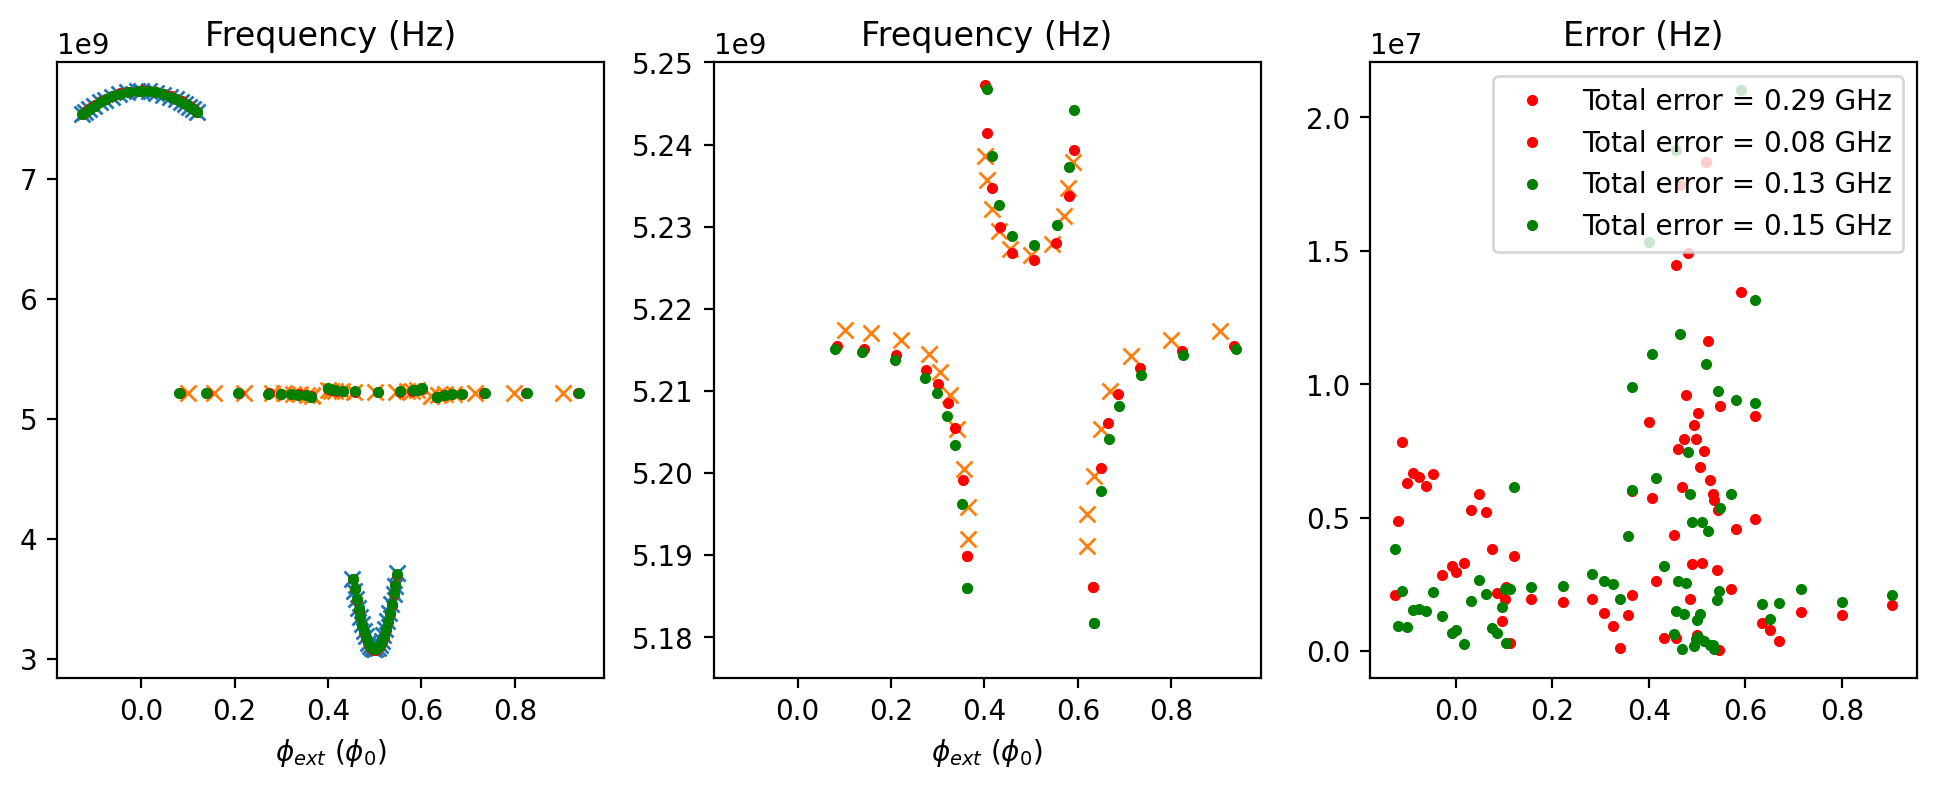

In [291]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([5.175e9,5.25e9])


# Qubit 1 - Qubit 2 avoided crossing while Qubit 3 is off-resonant

In [168]:
experiment_name = 'qubit_1_qubit_2'


### Load spectral data and theoretical model

In [169]:
ω_exp, I_exp = fits.get_experimental_spectrum(experiment_name)
ω_exp[0] *= GHz
ω_exp[1] *= GHz

In [170]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

## Guess parameters and set bounds

In [190]:
ω_q_1, μ_1, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
ω_q_2, μ_2, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']
φ_ext_i = 0.517
φ_ext_f = 0.52
g_q = 0.01 * GHz

ω_q_1 = 3700413785.010
μ_1 = 18224879747.790
ω_q_2 = 3659538760.137
μ_2 = 42955115348.269
g_q = 6400006.399
φ_ext_i = 0.502
φ_ext_f = 0.509

data_set = [I_exp, ω_exp]
parameters_guess = [ω_q_1, μ_1, ω_q_2, μ_2, g_q, φ_ext_i, φ_ext_f]
parameter_names =  ['ω_q_1', 'μ_1', 'ω_q_2', 'μ_2', 'g_q', 'φ_ext_i', 'φ_ext_f']
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
bounds = fits.create_bounds(parameters_guess, flexible_param_indices=[4])

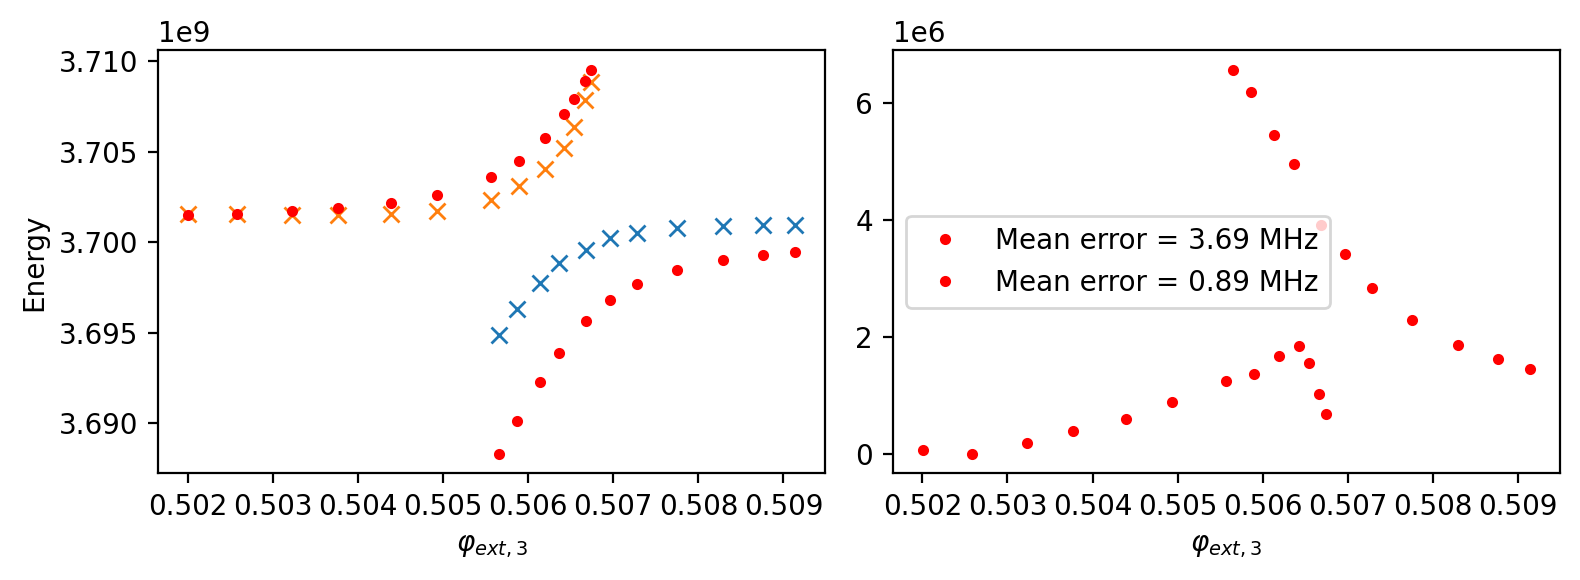

In [191]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_opt, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=200, figsize = [8,3], ncols=2)

for i in range(len(ω_exp)):
    ax1.plot(φ_ext_guess[i], ω_exp[i], 'x')
    ax1.plot(φ_ext_guess[i], ω_guess[i], '.r')
ax1.set_ylabel('Energy')
ax1.set_xlabel(r'$\varphi_{ext,3}$')

for i in range(len(ω_exp)):
    ax2.plot(φ_ext_guess[i], np.abs(ω_guess[i]-ω_exp[i]), 'r.' , label = f'Mean error = {np.abs(ω_guess[i]-ω_exp[i]).mean()/1e6:.2f} MHz' )
ax2.legend()
ax2.set_xlabel(r'$\varphi_{ext,3}$')

fig.tight_layout()

## Optimize or load previous optimization

In [192]:
load = False

In [193]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='Nelder-Mead').x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.0526579519127779
2.509141701365334
0.0526579519127779
2.1579621120407144
0.054127293503502844
0.05778907820970154
4.357982164853203
3.1744121510817567
2.2652413072395143
2.225117022977226
2.360435853449025
1.0751683019843359
2.5325628620910687
0.7862548511998758
3.9810096837330295
0.6299604460771513
1.9003704871184124
0.9461437027293239
1.4830677489160824
0.35507913869312097
1.0193829538145804
0.45022968390248347
0.8308172828156762
0.24882389884732628
1.0401440369763026
0.2557079432889409
0.3688166921278939
0.13063994918330335
0.5860254702515258
0.2316464018200407
0.5020017092524987
0.14905265825678204
0.2895725733542781
0.11987210984201623
0.2848635260296817
0.12835939696671678
0.23579312213299417
0.08961906861462784
0.17799794306451272
0.06786445739799452
0.14446233160920954
0.07258765865826702
0.11839931367477893
0.07662653062596225
0.1446915087287617
0.06415665412507343
0.06831038607603693
0.07081176850391292
0.05833041565910721
0.06745352947222376
0.07305959443250895
0.056929530

In [194]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

ω_q_1 = 3700413785.010
μ_1 = 18224879747.790
ω_q_2 = 3659538760.137
μ_2 = 42955115348.269
g_q = 6400006.399
φ_ext_i = 0.502
φ_ext_f = 0.509


Optimized parameters 

ω_q_1 = 3701173456.391
μ_1 = 20535039138.508
ω_q_2 = 3645231438.756
μ_2 = 50335677720.745
g_q = 2883354.221
φ_ext_i = 0.504
φ_ext_f = 0.508


## Plot fits and errors

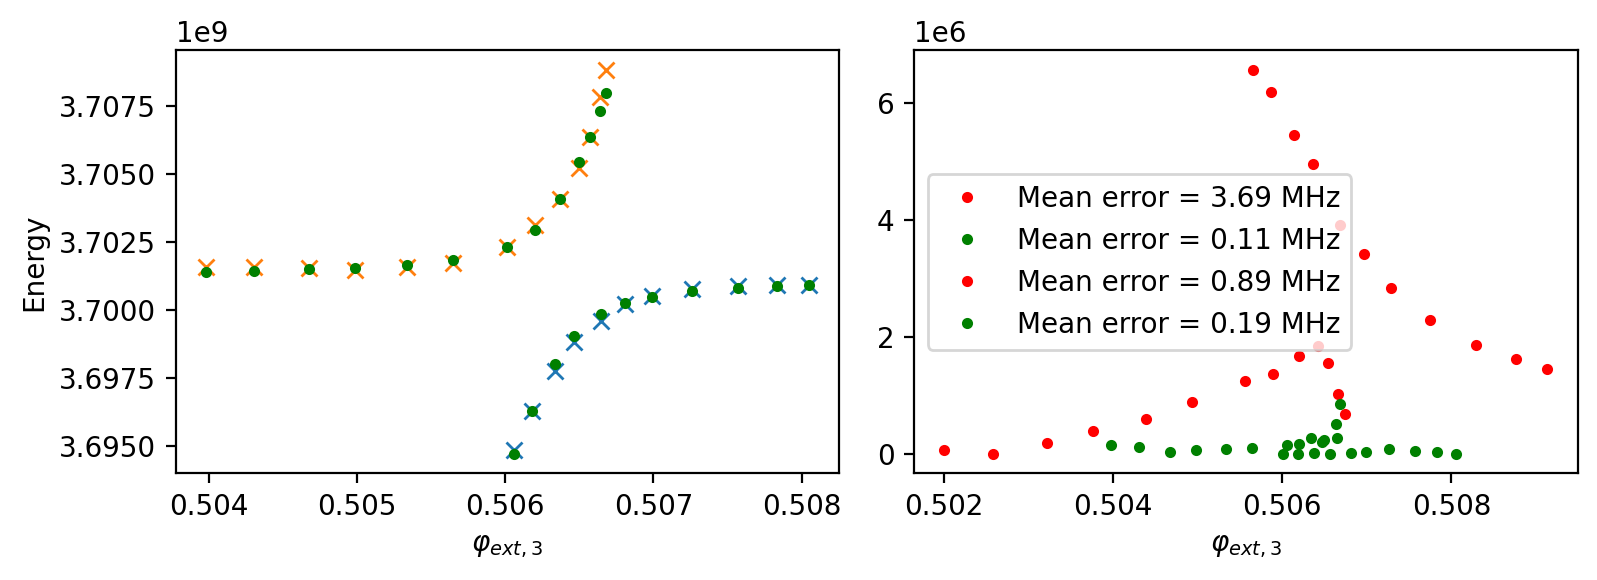

In [195]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=200, figsize = [8,3], ncols=2)

for i in range(len(ω_exp)):
    ax1.plot(φ_ext_opt[i], ω_exp[i], 'x')
    ax1.plot(φ_ext_opt[i], ω_opt[i], '.g')
ax1.set_ylabel('Energy')
ax1.set_xlabel(r'$\varphi_{ext,3}$')

for i in range(len(ω_exp)):
    ax2.plot(φ_ext_guess[i], np.abs(ω_guess[i]-ω_exp[i]), 'r.' , label = f'Mean error = {np.abs(ω_guess[i]-ω_exp[i]).mean()/1e6:.2f} MHz' )
    ax2.plot(φ_ext_opt[i], np.abs(ω_opt[i]-ω_exp[i]), 'g.'   , label = f'Mean error = {np.abs(ω_opt[i]-ω_exp[i]).mean()/1e6:.2f} MHz'  )
ax2.legend()
ax2.set_xlabel(r'$\varphi_{ext,3}$')

fig.tight_layout()

# Qubit 1 - Qubit 2 - Qubit 3
Below, we fix q1 at its half-flux point around 3.7 GHz, move q2 on resonance, and then sweep q3 through 3.7 GHz.

In [218]:
experiment_name = 'qubit_1_qubit_2_qubit_3'
method = 'SlSQP'
load = False


### Load spectral data and theoretical model

In [211]:
ω_exp, I_exp = fits.get_experimental_spectrum(experiment_name)

In [212]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [213]:
CF_1, LF_1, EJ_1, _, _= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
CF_2, LF_2, EJ_2, _, _= np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']
CF_3, LF_3, EJ_3, _, _= np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']
LF_1-=0.065

In [304]:
#This set of qubit_3 propperties fits way better than the other we have
CF_3, LF_3, EJ_3 = (26.469686661169657, 30.0, 5.780487830155092)

In [205]:
# Initial conditions 1
CF_1, LF_1, EJ_1 = (25.46, 28.11, 5.18)
LF_1-=0.0275

# Initial conditions 2
# CF_1, LF_1, EJ_1 = (32.15, 22.06, 6.19)
# LF_1-=0.07

In [305]:
φ_ext_i = 5.47014884e-01
φ_ext_f = 5.49545749e-01

C_int_12 = 15099.771
C_int_23 = 13140.112
C_int_13 = 200000.000

nmax_f = 8

data_set = [I_exp, ω_exp, φ_ext_i, φ_ext_f, nmax_f]
parameters_guess = [C_int_12, C_int_23, C_int_13, LF_1, CF_1, EJ_1, CF_2, LF_2, EJ_2, CF_3, LF_3, EJ_3]
parameter_names =  ['C_int_12', 'C_int_23', 'C_int_13', 'LF_1', 'CF_1', 'EJ_1', 'CF_2', 'LF_2', 'EJ_2', 'CF_3', 'LF_3', 'EJ_3']
bounds = fits.create_bounds(parameters_guess)

In [306]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, ax = plt.subplots(dpi=150)

for i in range(len(ω_exp)):
    ax.plot(φ_ext_guess[i], ω_exp[i]*1e9, 'x')
    ax.plot(φ_ext_guess[i], ω_guess[i]*1e9, '.')

ValueError: too many values to unpack (expected 5)

## Optimize or load previous optimization

In [219]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.04558397184692664
0.04558397184516272
0.0455839718414075
0.04558397184576135
0.04558396737131387
0.045583970111783056
0.04558396150500377
0.04558397186288543
0.04558397185027685
0.045583971848036864
0.04558398133226005
0.04558398369707062
0.045583994889040635
12.683745161662715
1.1773046762313562
0.12416448144893666
0.04872197941944778
0.044912867954624236
0.0449128679563402
0.04491286795216043
0.04491286795689797
0.04491288930271553
0.0449128762908626
0.04491291726536106
0.044912867860813055
0.0449128677085775
0.044912867555446656
0.04491287790955534
0.044912880381139164
0.04491289210379401
6.972316297361583
0.9578911161864112
0.14483470152003308
0.026586040428056013
0.026586040426860524
0.02658604042441093
0.026586040427727387
0.02658602718183234
0.026586035280802722
0.02658600982702497
0.02658604051117175
0.026586040563018276
0.026586040637762043
0.026586031504348018
0.026586029284001444
0.0265860186183855
0.014428891746979478
0.014428891746375516
0.014428891748087924
0.0144288917

In [222]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

C_int_12 = 15099.771
C_int_23 = 13140.112
C_int_13 = 200000.000
LF_1 = 22.397
CF_1 = 31.587
EJ_1 = 6.105
CF_2 = 22.197
LF_2 = 20.603
EJ_2 = 9.465
CF_3 = 26.085
LF_3 = 30.465
EJ_3 = 5.719


Optimized parameters 

C_int_12 = 15099.770
C_int_23 = 13140.112
C_int_13 = 200000.000
LF_1 = 22.397
CF_1 = 31.578
EJ_1 = 6.108
CF_2 = 22.184
LF_2 = 20.601
EJ_2 = 9.467
CF_3 = 26.088
LF_3 = 30.464
EJ_3 = 5.692


In [223]:
φ_ext_opo, ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

Text(0.5, 0, '$\\varphi_{ext,3}$')

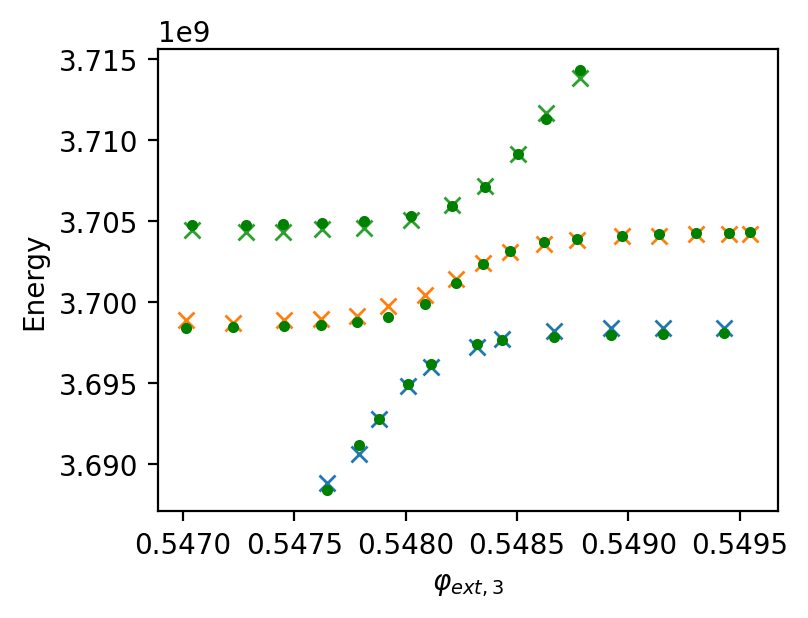

In [224]:
fig, ax = plt.subplots(dpi=200, figsize = [4,3])

for i in range(len(ω_exp)):
    ax.plot(φ_ext_guess[i], ω_exp[i]*1e9, 'x')
    # ax.plot(φ_ext_guess[i], ω_guess[i]*1e9, '.r')
    ax.plot(φ_ext_opo[i], ω_opt[i]*1e9, '.g')
ax.set_ylabel('Energy')
ax.set_xlabel(r'$\varphi_{ext,3}$')

# Estimate circuit capacitances from fits

In [314]:
CF_1, _, _, _, _= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
C_int_11, CR_1, _, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_1' + '.npz')['parameters_opt']
CF_2, _, _, _, _= np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']
CR_2, _, _, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_2' + '.npz')['parameters_opt']
CF_3, _, _, _, _= np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']
C_int_33, CR_3, _, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_3' + '.npz')['parameters_opt']
C_int_12, _, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1_qubit_2' + '.npz')['parameters_opt']
C_int_12, C_int_23, C_int_13 = np.load(os.getcwd() + opt_dir +  'qubit_1_qubit_2_qubit_3' + '.npz')['parameters_opt'] 

In [315]:
C_inv = np.array([[CF_1**-1     ,C_int_11**-1   ,C_int_12**-1   ,C_int_12**-1   ,C_int_13**-1   ,C_int_13**-1   ],
                  [C_int_11**-1 ,CR_1**-1       ,C_int_12**-1   ,C_int_12**-1   ,C_int_13**-1   ,C_int_13**-1   ],
                  [C_int_12**-1 ,C_int_12**-1   ,CF_2**-1       ,0              ,C_int_23**-1   ,C_int_23**-1   ],
                  [C_int_12**-1 ,C_int_12**-1   ,0              ,CR_2**-1       ,C_int_23**-1   ,C_int_23**-1   ],
                  [C_int_13**-1 ,C_int_13**-1   ,C_int_23**-1   ,C_int_23**-1   ,CF_3**-1       ,C_int_33**-1   ],
                  [C_int_13**-1 ,C_int_13**-1   ,C_int_23**-1   ,C_int_23**-1   ,C_int_33**-1   ,CR_3**-1       ]])

In [316]:
C_mat = np.linalg.inv(C_inv)

In [317]:
matrix = C_mat
max_len = 0
for row in matrix:
    for num in row:
        num_str = f"{num:.4g}"  # Using 4 significant digits for this example
        if len(num_str) > max_len:
            max_len = len(num_str)

# Print the matrix with the numbers properly aligned
for row in matrix:
    for num in row:
        print(f"{num:>{max_len}.4g}", end=' ')
    print()  # New line at the end of each row

     25.48    -0.3456   -0.03711   -0.01053  -0.003201  -0.001345 
   -0.3456      7.486   -0.01054  -0.002991 -0.0009095  -0.000382 
  -0.03711   -0.01054      22.45  5.182e-05   -0.04555   -0.01913 
  -0.01053  -0.002991  5.182e-05      6.368   -0.01292  -0.005428 
 -0.003201 -0.0009095   -0.04555   -0.01292      26.47    -0.2291 
 -0.001345  -0.000382   -0.01913  -0.005428    -0.2291      11.25 


In [318]:
CF_1_single, _, _, _, _= np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']
CR_1_single, _, _, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_1_single_1' + '.npz')['parameters_opt']
CF_1_single, CR_1_single

(24.377436446888616, 7.212070212090448)

In [319]:
CF_1 - CF_1_single

1.0845230695724553

In [320]:
CR_1 - CR_1_single

0.26898176592132916

In [321]:
C_12 = -C_mat[0,2]*4
C_12

0.14842961677055738

In [322]:
C_23 = -C_mat[2,4]*4
C_23

0.1822087337868481

In [323]:
import sympy as sym

In [324]:
C_F_1, C_F_2, C_F_3, C_R_1, C_R_2, C_R_3, C_C = sym.symbols('C_F_1, C_F_2, C_F_3, C_R_1, C_R_2, C_R_3, C_C', real=True, positive=True, nonzero=True)

In [325]:
C_mat_sym = sym.Matrix([[C_F_1 + C_C/4  ,-C_C / 4       ,-C_C / 4       ,-C_C / 4       , 0             , 0             ],
                        [-C_C / 4       , C_R_1 + C_C/4 ,-C_C / 4       ,-C_C / 4       , 0             ,0              ],
                        [-C_C / 4       ,-C_C / 4       , C_F_2 + C_C/2 , 0             ,-C_C / 4       ,-C_C / 4       ],
                        [-C_C / 4       ,-C_C / 4       , 0             , C_R_2 + C_C/2 ,-C_C / 4       ,-C_C / 4       ],
                        [0              ,0              ,-C_C / 4       ,-C_C / 4       ,C_F_3 + C_C/4  ,-C_C / 4       ],
                        [0              ,0              ,-C_C / 4       ,-C_C / 4       ,-C_C / 4       ,C_R_3 + C_C/4  ]])

In [326]:
C_inv_sym = C_mat ** -1
sym.simplify(C_inv_sym)

[[0.0392495574423254, -2.89372193753105, -26.9487996198441, -94.987175450752, -312.36859600154, -743.756432965905], [-2.89372193753105, 0.133587215107005, -94.8560687755659, -334.341795347299, -1099.49450230171, -2617.92036576402], [-26.9487996198441, -94.8560687755659, 0.0445525599742132, 19297.7301280333, -21.9528445034874, -52.270201071328], [-94.987175450752, -334.341795347299, 19297.7301280333, 0.157036549234873, -77.3777950005736, -184.238215803582], [-312.36859600154, -1099.49450230171, -21.9528445034874, -77.3777950005736, 0.0377722377135085, -4.36584255512601], [-743.756432965905, -2617.92036576402, -52.270201071328, -184.238215803582, -4.36584255512601, 0.0888746226309023]]

In [326]:
def hamiltonian_qubit_C_qubit_C_qubit(coupling_capacitances, params_1='load', params_2='load', params_3='load', nmax_r=5, nmax_f=10):
    '''
    params_1, params_2 and params_3 can be either the string 'load', in which case the corresponding parameters for each circuit are loaded from those of the fits,
    or a list of parameters
    '''
    if params_1 == 'load':
        CF_1, LF_1, EJ_1, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
        C_int_11, CR_1, LR_1, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_1' + '.npz')['parameters_opt']
    

# Full spectrum

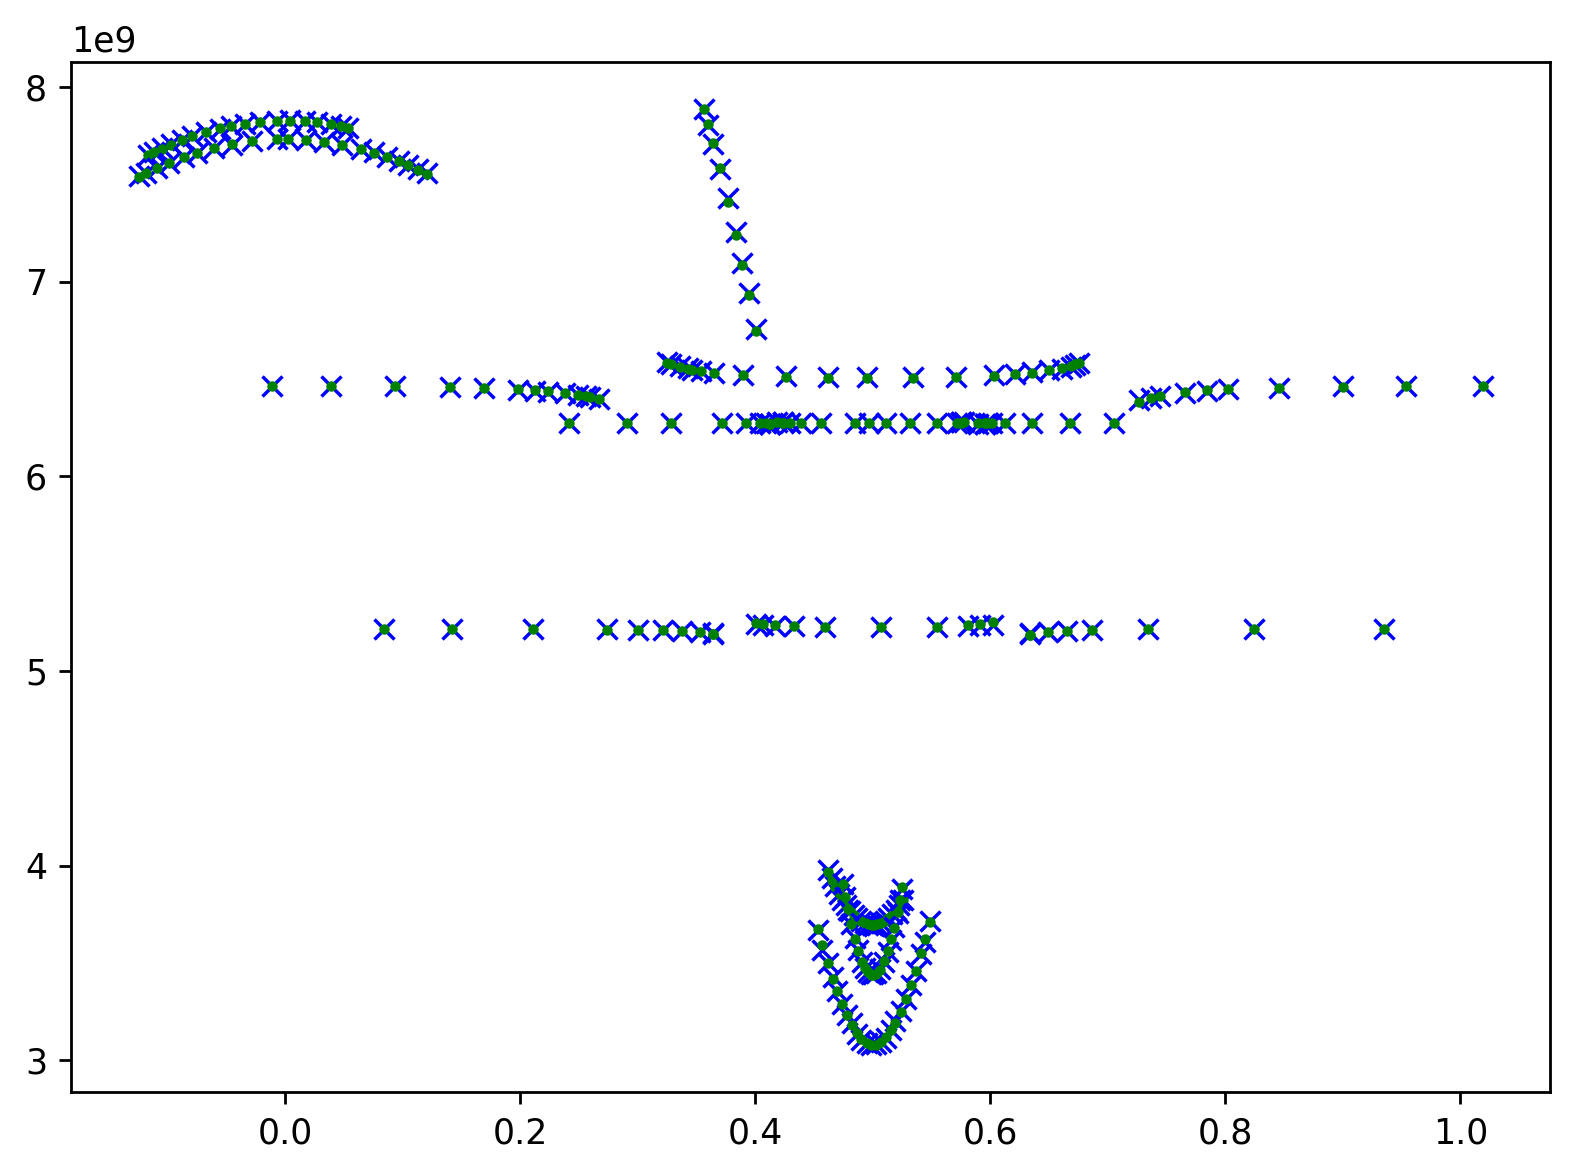

In [330]:
experiment_names = ['qubit_1', 'resonator_1', 'qubit_2', 'resonator_2', 'qubit_3', 'resonator_3']

fig, ax = plt.subplots(dpi=250)

for experiment_name in experiment_names:
    _, ω_exp, _, _, _ = fits.get_experimental_spectrum(experiment_name)
    theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)
    parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
    parameters_opt = np.load(parameters_path)['parameters_opt'] 
    data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
        
    φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')
    ax.plot(φ_ext_opt, ω_exp, 'xb')
    ax.plot(φ_ext_opt, ω_opt, '.g', markersize=4)
   
fig.tight_layout()

In [ ]:
    elif experiment_name == 'qubit_1_qubit_2':
        def qubit_qubit_crossing_spectrum(parameters, data_set, out='error'):
            C_int, φ_ext_i, φ_ext_f, LF_1 = parameters
            CF_1, EJ_1, CF_2, LF_2, EJ_2, I_exp, ω_exp, indices_0, indices_1, nmax_f = data_set

            qubit_1 = sq_ext.sq_fluxonium(C_F_eff=CF_1, L_F_eff=LF_1, EJ=EJ_1, nmax_f=nmax_f)
            H_1 = qubit_1.hamiltonian()
            Q_1 = qubit_1.charge_op(0)
            I = qt.identity(H_1.shape[0])

            qubit_2 = sq_ext.sq_fluxonium(C_F_eff=CF_2, L_F_eff=LF_2, EJ=EJ_2, nmax_f=nmax_f)
            loop = qubit_2.loops[0]

            I_unitary = (I_exp - I_exp.min()) / (I_exp.max() - I_exp.min())
            Δ_φ_ext = φ_ext_f - φ_ext_i
            φ_ext_values = I_unitary * Δ_φ_ext + φ_ext_i
            ω_vs_φ_ext = np.zeros([len(φ_ext_values), 2])

            for i, φ_ext in enumerate(φ_ext_values):
                loop.set_flux(φ_ext)
                H_2 = qubit_2.hamiltonian()
                Q_2 = qubit_2.charge_op(0)
                H = qt.tensor(H_1, I) + qt.tensor(I, H_2) + C_int ** -1 * fF ** -1 * qt.tensor(Q_1, Q_2)
                ω_vs_φ_ext[i] = sq_ext.diag(H, 3, remove_ground=True)[0][1:]

            if out == 'error':
                sort_indices = np.argsort(φ_ext_values)
                ω_vs_φ_ext_sorted = ω_vs_φ_ext[sort_indices]
                ω_exp_sorted = ω_exp[sort_indices]
                error_0 = np.sum(np.abs(ω_exp_sorted[indices_0] - ω_vs_φ_ext_sorted[indices_0, 0]))
                error_1 = np.sum(np.abs(ω_exp_sorted[indices_1] - ω_vs_φ_ext_sorted[indices_1, 1]))
                error = error_0 + error_1
                print(error)
                return error

            elif out == 'spectrum':
                return φ_ext_values, ω_vs_φ_ext * 1e9
        return qubit_qubit_crossing_spectrum